## Surprise Housing Price Prediction using Linear, Ridge and Lasso Regressions models

### The solution is divided into the following sections:

- Understand the data 
- Clean and prepare the data
- Exploration of data
- Build and evaluate the model

### 1. Understand the data
Let's first have a look at the dataset, understand the size, attribute names etc.

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

import calendar

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from scipy import stats
from scipy.stats import skew 

In [2]:
#Read the Dataset
df = pd.read_csv("train.csv")

In [3]:
#Check the Data
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
#Check the shape of the dataset 

df.shape

(1460, 81)

There are 81 fields and 1460 rows 

In [5]:
#Check the description of the dataset

df.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [6]:
#Check the info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### 2. Clean the Data

Check for null values and treat fields.

In [7]:
#Check for null values

df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
#Treat the coulmns with null values
df_null=df[df.columns[df.isna().any()]]

In [9]:
df_null

LotFrontage Alley MasVnrType  MasVnrArea BsmtQual BsmtCond BsmtExposure  \
0            65.0   NaN    BrkFace       196.0       Gd       TA           No   
1            80.0   NaN        NaN         0.0       Gd       TA           Gd   
2            68.0   NaN    BrkFace       162.0       Gd       TA           Mn   
3            60.0   NaN        NaN         0.0       TA       Gd           No   
4            84.0   NaN    BrkFace       350.0       Gd       TA           Av   
...           ...   ...        ...         ...      ...      ...          ...   
1455         62.0   NaN        NaN         0.0       Gd       TA           No   
1456         85.0   NaN      Stone       119.0       Gd       TA           No   
1457         66.0   NaN        NaN         0.0       TA       Gd           No   
1458         68.0   NaN        NaN         0.0       TA       TA           Mn   
1459         75.0   NaN        NaN         0.0       TA       TA           No   

     BsmtFinType1 BsmtFinType2 Electrical FireplaceQu GarageType  GarageYrBlt  \
0             GLQ          Unf      SBrkr         NaN     Attchd       2003.0   
1             ALQ          Unf      SBrkr          TA     Attchd       1976.0   
2             GLQ          Unf      SBrkr          TA     Attchd       2001.0   
3             ALQ          Unf      SBrkr          Gd     Detchd       1998.0   
4             GLQ          Unf      SBrkr          TA     Attchd       2000.0   
...           ...          ...        ...         ...        ...          ...   
1455          Unf          Unf      SBrkr          TA     Attchd       1999.0   
1456          ALQ          Rec      SBrkr          TA     Attchd       1978.0   
1457          GLQ          Unf      SBrkr          Gd     Attchd       1941.0   
1458          GLQ          Rec      FuseA         NaN     Attchd       1950.0   
1459          BLQ          LwQ      SBrkr         NaN     Attchd       1965.0   

     GarageFinish GarageQual GarageCond PoolQC  Fence MiscFeature  
0             RFn         TA         TA    NaN    NaN         NaN  
1             RFn         TA         TA    NaN    NaN         NaN  
2             RFn         TA         TA    NaN    NaN         NaN  
3             Unf         TA         TA    NaN    NaN         NaN  
4             RFn         TA         TA    NaN    NaN         NaN  
...           ...        ...        ...    ...    ...         ...  
1455          RFn         TA         TA    NaN    NaN         NaN  
1456          Unf         TA         TA    NaN  MnPrv         NaN  
1457          RFn         TA         TA    NaN  GdPrv        Shed  
1458          Unf         TA         TA    NaN    NaN         NaN  
1459          Fin         TA         TA    NaN    NaN         NaN  

[1460 rows x 19 columns]

In [10]:
#Check the volume of null values

df_null.isnull().sum()/len(df_null)*100

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [11]:
# Drop fields with more than 450% null values

df.drop(['Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature'],axis='columns',inplace=True)

In [12]:
##Check for missing values, print total missing count as well as percentage of total values 
df_null_data = df.isnull().sum()
null_val_percentage = 100*df_null_data/len(df)
null_data = pd.concat([df_null_data,null_val_percentage],axis =1)
null_data = null_data.rename(columns = {0:'Missing Values',1:'% of Total Values'})
null_data = null_data.sort_values('Missing Values',ascending = False)
null_data[(null_data['Missing Values'] > 0)]

Missing Values  % of Total Values
LotFrontage              259          17.739726
GarageYrBlt               81           5.547945
GarageCond                81           5.547945
GarageType                81           5.547945
GarageFinish              81           5.547945
GarageQual                81           5.547945
BsmtFinType2              38           2.602740
BsmtExposure              38           2.602740
BsmtFinType1              37           2.534247
BsmtCond                  37           2.534247
BsmtQual                  37           2.534247
MasVnrArea                 8           0.547945
Electrical                 1           0.068493

In [13]:
#check the mode for column Electrical
(df['Electrical'].mode())

0    SBrkr
Name: Electrical, dtype: object

In [14]:
# Input values in all categorical columns 

df['LotFrontage']=df.LotFrontage.fillna(df.LotFrontage.mean())
df['BsmtQual'] = df['BsmtQual'].fillna('No_Basement')
df['BsmtCond'] = df['BsmtCond'].fillna('No_Basement')
df['BsmtExposure'] = df['BsmtExposure'].fillna('No_Basement')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('No_Basement')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('No_Basement')
df['GarageType'] = df['GarageType'].fillna('No_Garage')
df['GarageFinish'] = df['GarageFinish'].fillna('No_Garage')
df['GarageQual'] = df['GarageQual'].fillna('No_Garage')
df['GarageCond'] = df['GarageCond'].fillna('No_Garage')

# Input values in all numeric data type columns
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median()) 
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median()) 
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0]) 
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [15]:
#Check the count of null values in the data
df.isnull().sum().sum()

0

In [16]:
#Check the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [17]:
# Check for duplicate data
dup_data = df.duplicated()
print('Number of duplicate rows = %d' % (dup_data.sum()))
df[dup_data]

Number of duplicate rows = 0


Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 75 columns]

### Manipulate/Prepare the Data:

#### Derived Metrics

In [18]:
# Derive Age for House/garage built and remodel date  
df['HouseBuiltAge'] = df.YrSold - df.YearBuilt
df['HouseRemodelAge'] = df.YrSold - df.YearRemodAdd

In [19]:
#Convert GarageYrBlt to integer
df['GarageYrBlt'] = pd.to_numeric(df['GarageYrBlt'], downcast='integer', errors='coerce')

In [20]:
# Derive age of garage
df['GarageAge'] = df.YrSold - df.GarageYrBlt

In [21]:
# Create temporary dataframe to prepare numeric data
numColumns = df.select_dtypes(include=np.number).columns.tolist()
numColumns

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'HouseBuiltAge',
 'HouseRemodelAge',
 'GarageAge']

In [22]:
# Print all unique value counts for numeric columns
for i in range(len(numColumns)):
    print("The uniques Value Count for {0} : {1}".format(numColumns[i], df[numColumns[i]].nunique()))

The uniques Value Count for Id : 1460
The uniques Value Count for MSSubClass : 15
The uniques Value Count for LotFrontage : 111
The uniques Value Count for LotArea : 1073
The uniques Value Count for OverallQual : 10
The uniques Value Count for OverallCond : 9
The uniques Value Count for YearBuilt : 112
The uniques Value Count for YearRemodAdd : 61
The uniques Value Count for MasVnrArea : 327
The uniques Value Count for BsmtFinSF1 : 637
The uniques Value Count for BsmtFinSF2 : 144
The uniques Value Count for BsmtUnfSF : 780
The uniques Value Count for TotalBsmtSF : 721
The uniques Value Count for 1stFlrSF : 753
The uniques Value Count for 2ndFlrSF : 417
The uniques Value Count for LowQualFinSF : 24
The uniques Value Count for GrLivArea : 861
The uniques Value Count for BsmtFullBath : 4
The uniques Value Count for BsmtHalfBath : 3
The uniques Value Count for FullBath : 4
The uniques Value Count for HalfBath : 3
The uniques Value Count for BedroomAbvGr : 8
The uniques Value Count for Kitc

## Observation:
* Based on the unique values, it is evident that many variables are categorical in nature and all the categorical data needs to be seperated from the numerical ones.

In [23]:
# Map respective values to the categorical variables

df.MSSubClass = df.MSSubClass.map({
20:'1-STORY 1946 & NEWER ALL STYLES', 
30:'1-STORY 1945 & OLDER', 
40:'1-STORY W/FINISHED ATTIC ALL AGES', 
45:'1-1/2 STORY - UNFINISHED ALL AGES', 
50:'1-1/2 STORY FINISHED ALL AGES', 
60:'2-STORY 1946 & NEWER', 
70:'2-STORY 1945 & OLDER', 
75:'2-1/2 STORY ALL AGES', 
80:'SPLIT OR MULTI-LEVEL', 
85:'SPLIT FOYER', 
90:'DUPLEX - ALL STYLES AND AGES', 
120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER', 
150:'1-1/2 STORY PUD - ALL AGES', 
160:'2-STORY PUD - 1946 & NEWER', 
180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER', 
190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'
})

df.OverallQual = df.OverallQual.map({10:'Very Excellent', 9:'Excellent', 8:'Very Good', 
                                                       7:'Good', 6:'Above Average', 5:'Average', 4:'Below Average', 
                                                       3:'Fair', 2:'Poor', 1:'Very Poor'})

df.OverallCond = df.OverallCond.map({10:'Very Excellent', 9:'Excellent', 8:'Very Good', 
                                                       7:'Good', 6:'Above Average', 5:'Average', 4:'Below Average', 
                                                       3:'Fair', 2:'Poor', 1:'Very Poor'})

df.MoSold = df.MoSold.apply(lambda x: calendar.month_abbr[x])

In [24]:
# Create temporary dataframe to prepare numeric data

#convert MasVnrArea to integer
df['MasVnrArea'] = pd.to_numeric(df['MasVnrArea'], errors='coerce')

numColumns = ["LotFrontage", "LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF",
           "1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","GarageArea","WoodDeckSF","OpenPorchSF",
           "PoolArea","MiscVal", 'HouseBuiltAge','HouseRemodelAge','GarageAge',
           "EnclosedPorch","3SsnPorch","ScreenPorch","SalePrice"]

numData = df[numColumns]
numData.shape

(1460, 23)

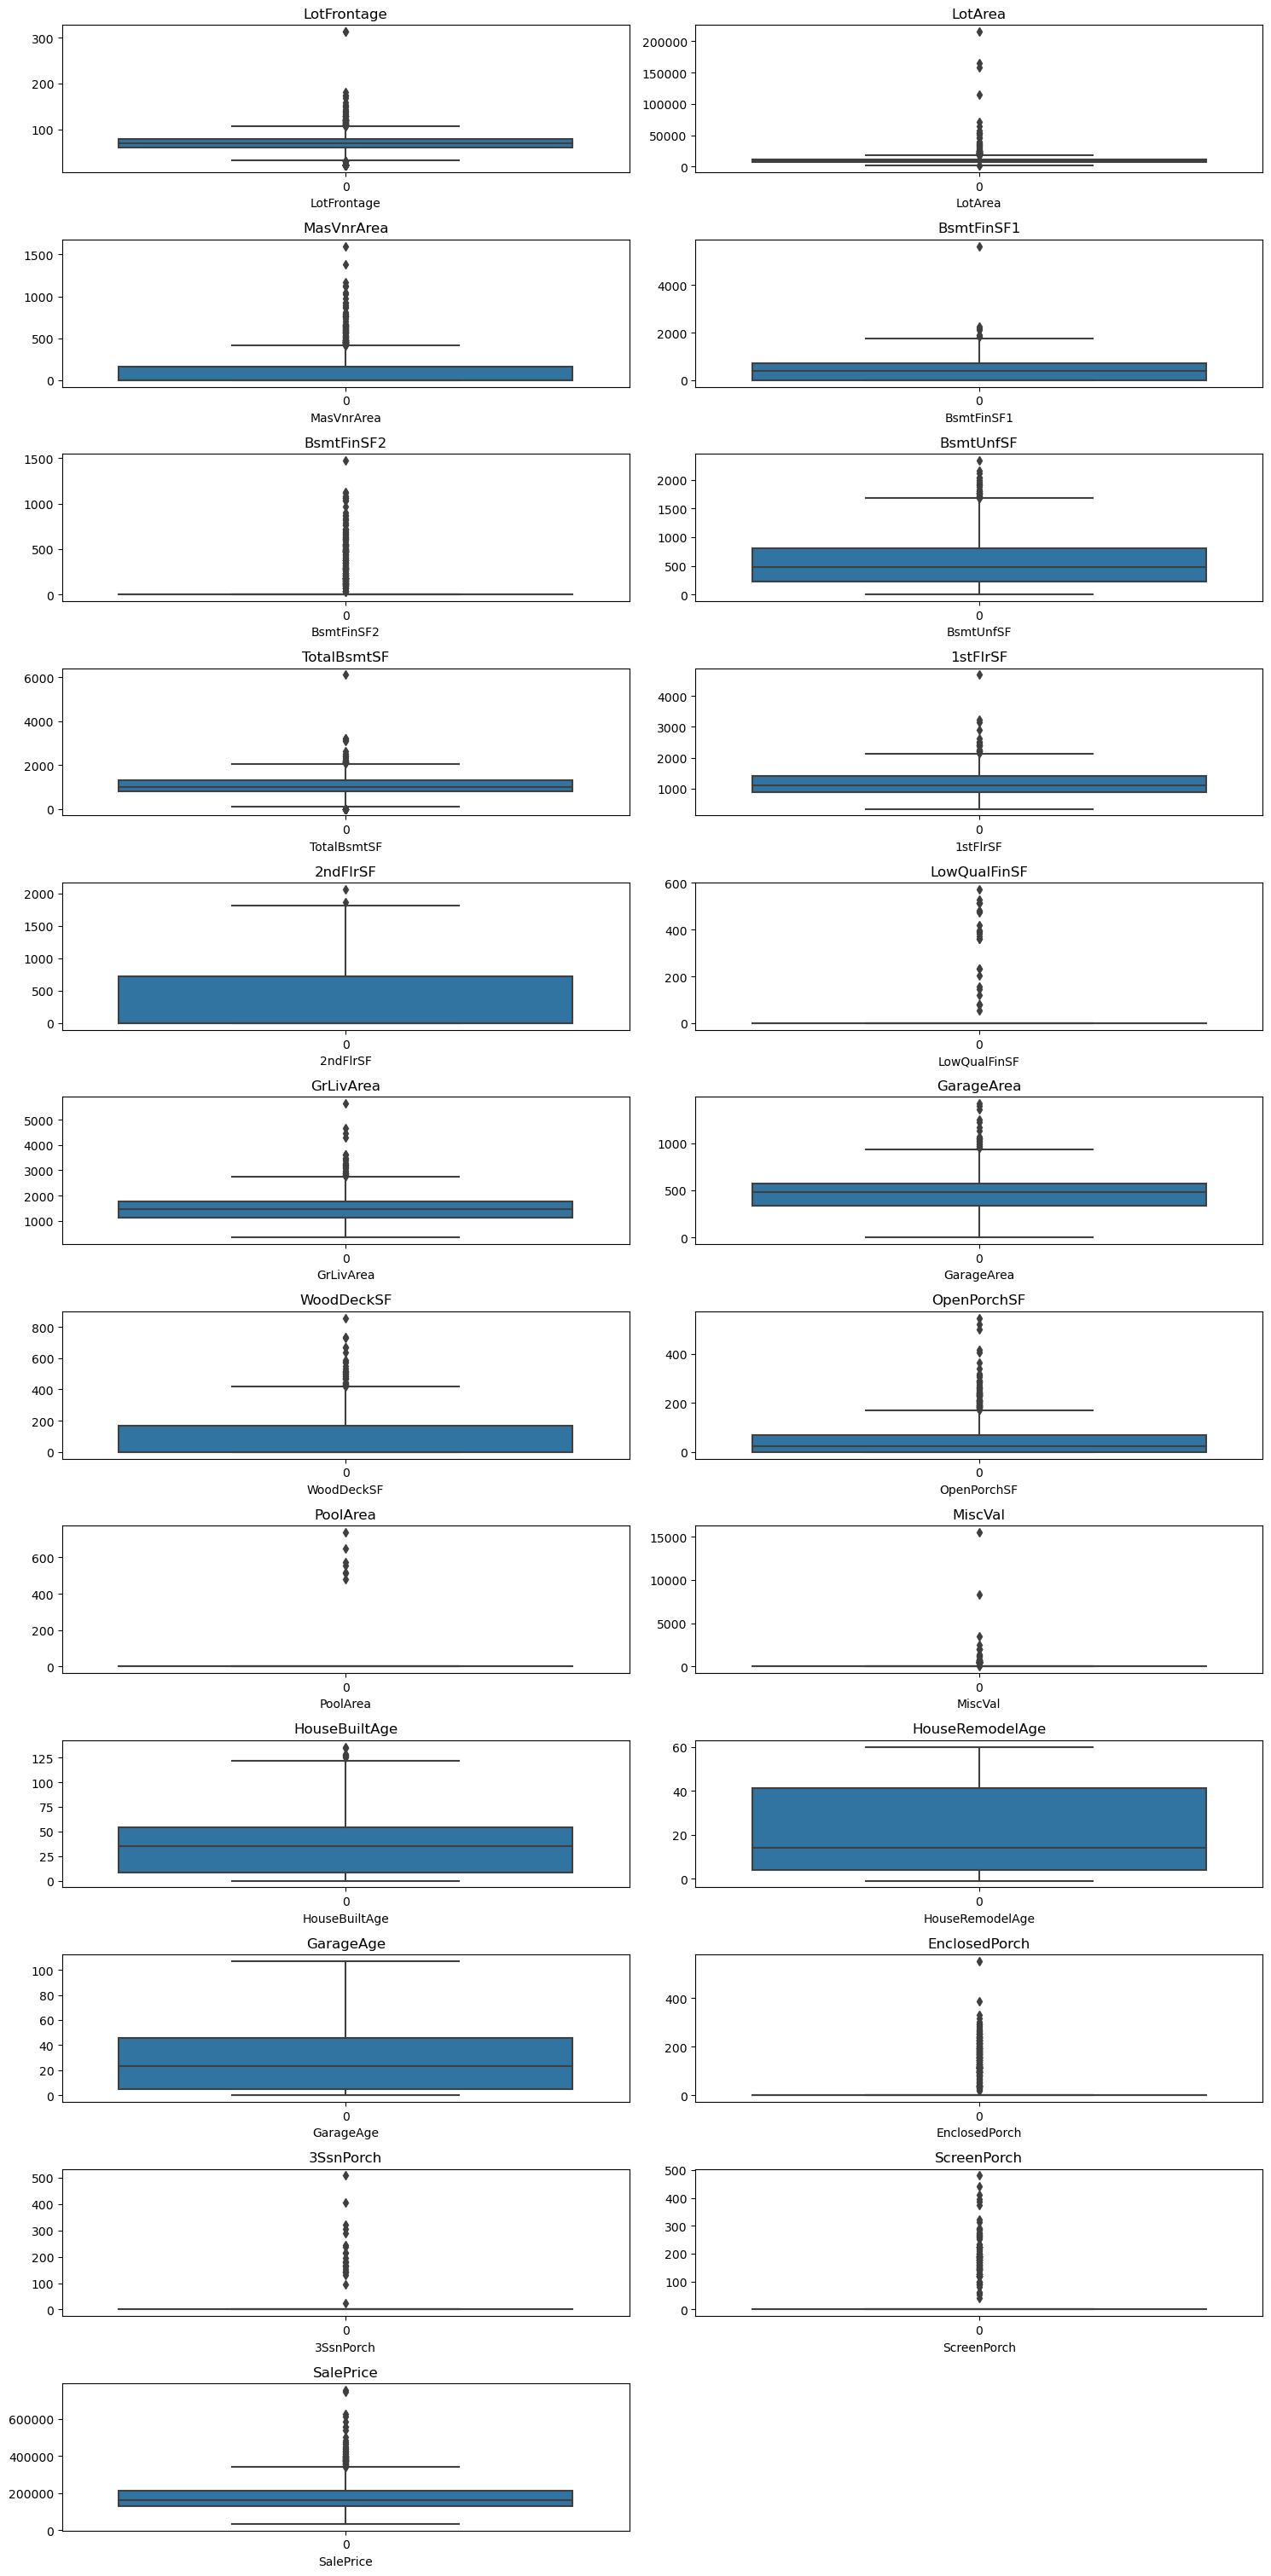

In [25]:
# Visualize all the numeric feature to check the spread in columns
a = 20
b = 2
c = 1

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 50)

for i in numColumns:
    plt.subplot(a, b, c)
    plt.title(i)
    plt.xlabel(i)
    sns.boxplot(numData[i])
    c = c + 1

plt.tight_layout()
plt.show();

### Exploration of Data

### Correlation Analysis

<Axes: >

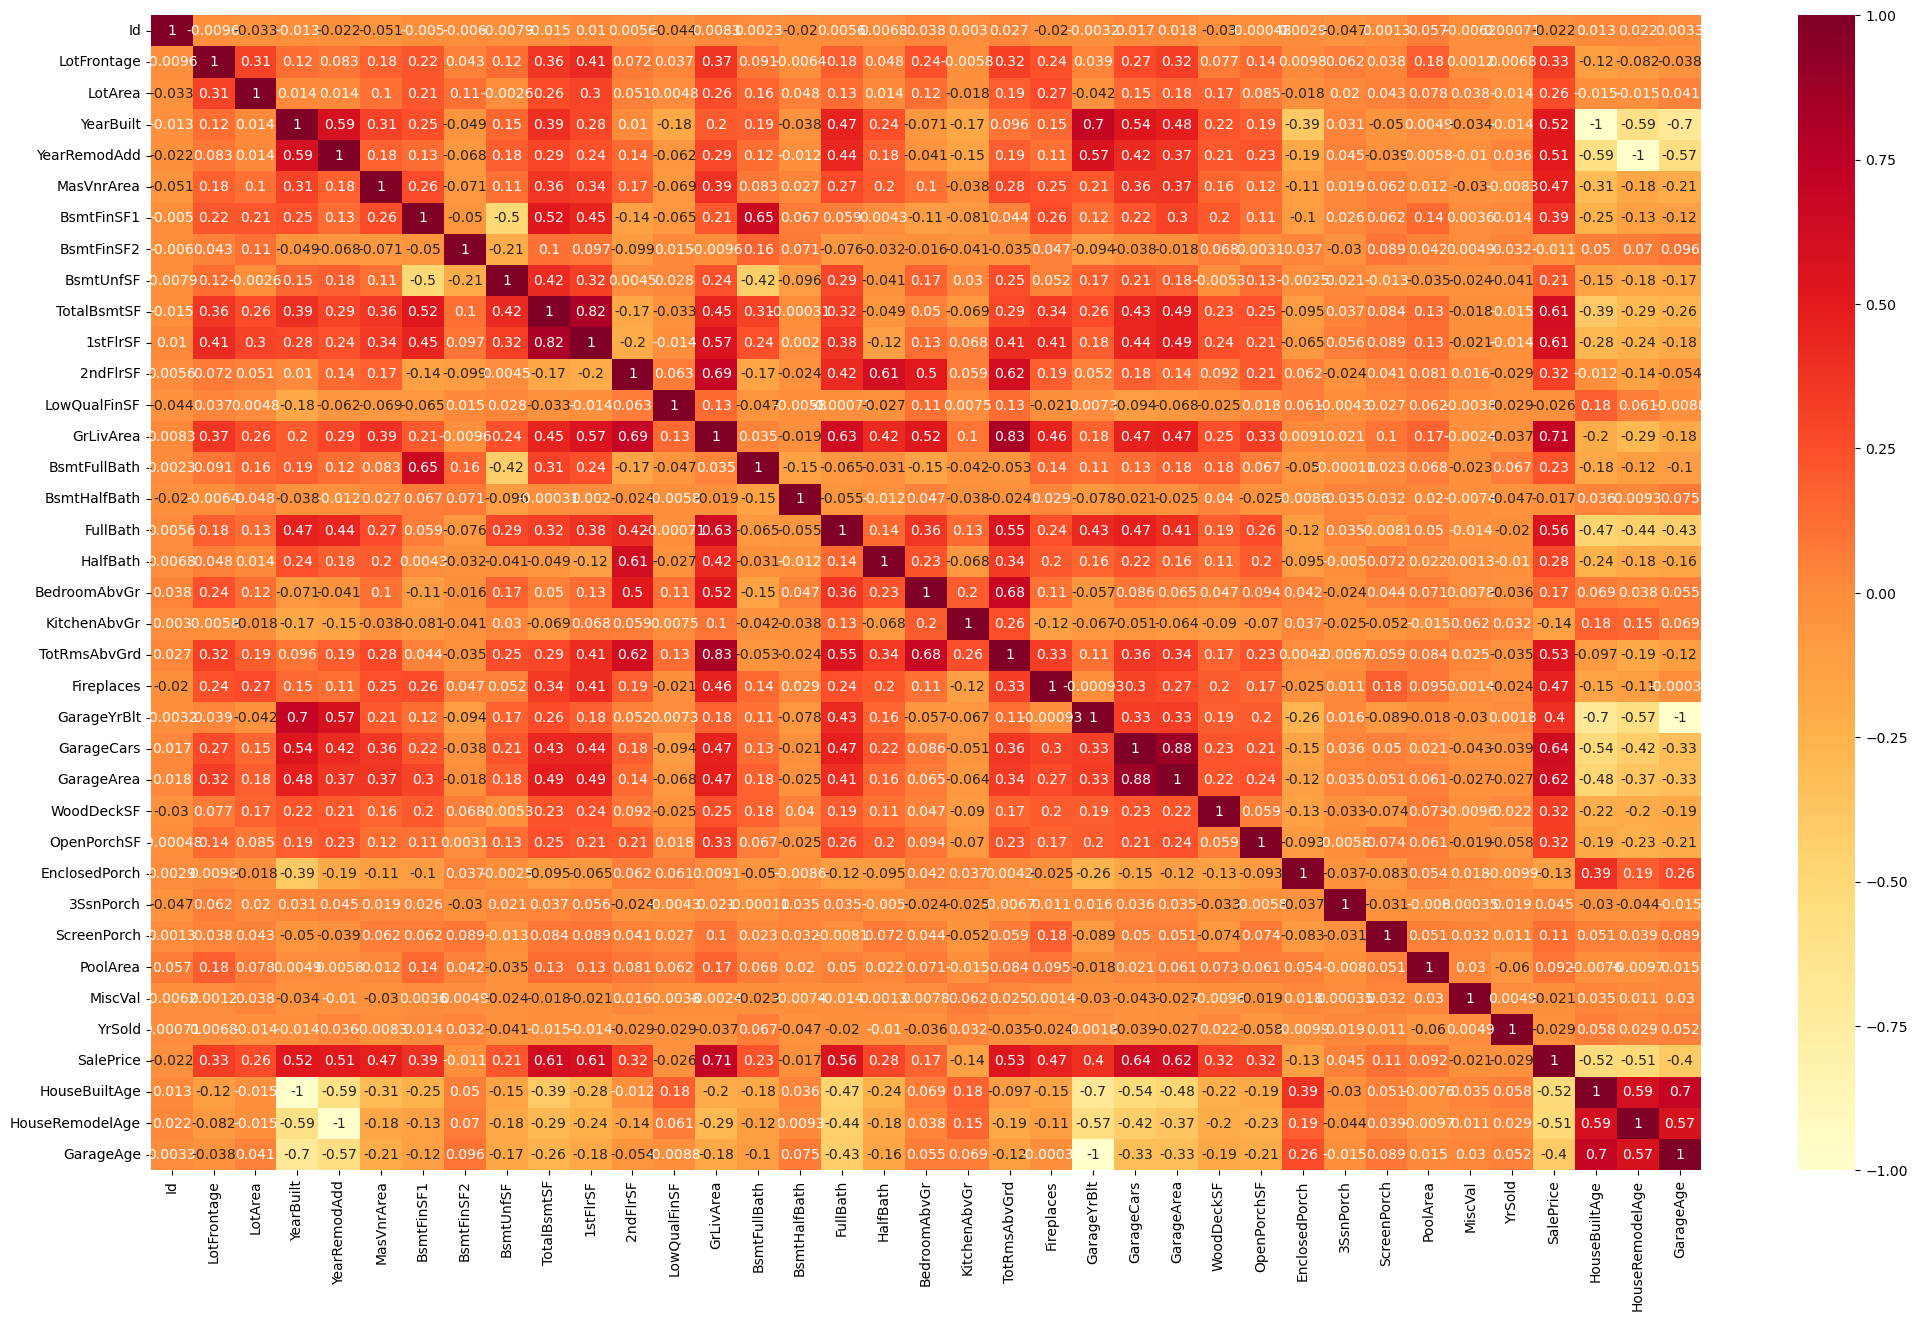

In [26]:
# Create heatmap to check correlation in numerical data 
plt.figure(figsize=(25, 15))

sns.heatmap(df.corr(numeric_only=True),annot=True,vmin=-1, vmax=1, cmap='YlOrRd')

## Observations:
* Target Variable - SalePrice - is higly correlated with GrLivArea, GarageArea, GarageCars, TotalBsmtSF etc.
* HouseBuiltAge, HouseRemodelAge and GarageAge has negative correlation with SalePrice.
* GarageArea and GarageCars are highly correlated to each other. Similarly TotalBsmtSF and 1stFlrSF.

In [27]:
#Columns having categorical data in numerical format, so changing to string for further processing
catCols1 = ["BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr",
               "TotRmsAbvGrd","Fireplaces","GarageCars", "YrSold"]

for i in catCols1:
    df[i] = df[i].apply(lambda x: str(x))

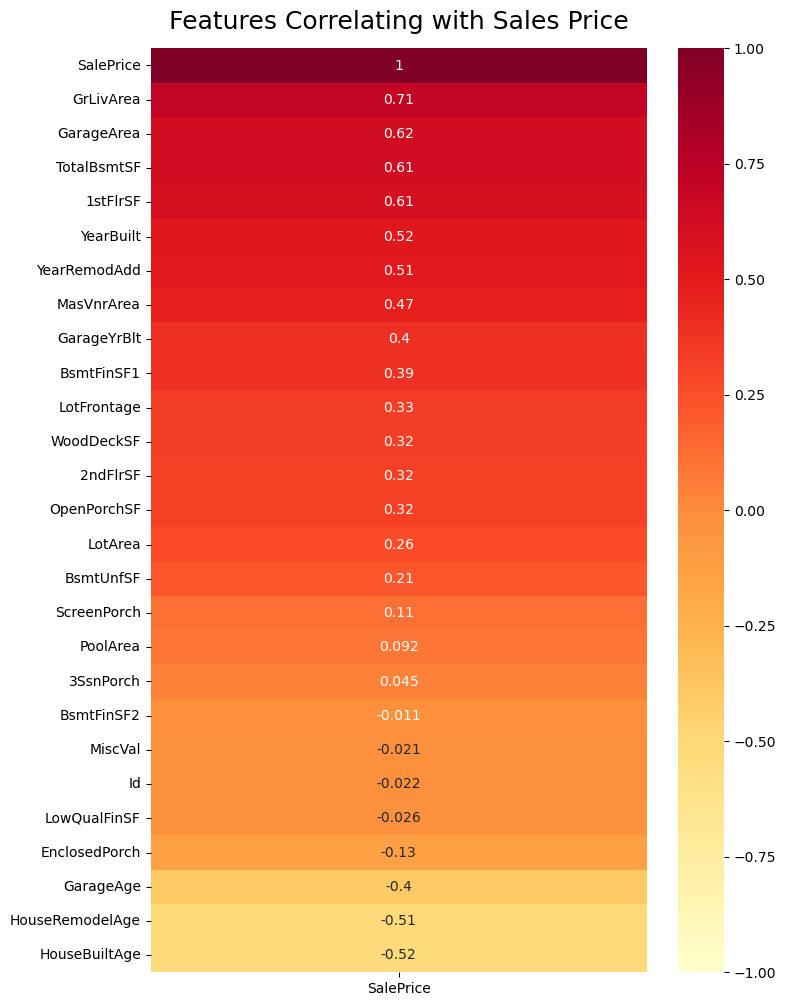

In [28]:
#Create correlation matrix in single column to get more clear view
plt.figure(figsize=(8, 12))
heatmap_outputvar = sns.heatmap(df.corr(numeric_only=True)[['SalePrice']].sort_values(by='SalePrice', ascending=False), vmin=-1, vmax=1, annot=True, cmap='YlOrRd')
heatmap_outputvar.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=14);

## Skewness in Features

In [29]:
# Apply log transformation on MasVnrArea and GarageAge before calculating their skewness as they contain zeroes.

numData['MasVnrArea'] = np.log(numData['MasVnrArea'] + 1)
numData['GarageAge'] = np.log(numData['GarageAge'] + 1)

# Check skewness in features
skew_in_vars = numData.apply(lambda x: round(x.skew(), 2))
skew_in_vars.sort_values(ascending=False)

MiscVal            24.48
PoolArea           14.83
LotArea            12.21
3SsnPorch          10.30
LowQualFinSF        9.01
BsmtFinSF2          4.26
ScreenPorch         4.12
EnclosedPorch       3.09
LotFrontage         2.38
OpenPorchSF         2.36
SalePrice           1.88
BsmtFinSF1          1.69
WoodDeckSF          1.54
TotalBsmtSF         1.52
1stFlrSF            1.38
GrLivArea           1.37
BsmtUnfSF           0.92
2ndFlrSF            0.81
HouseBuiltAge       0.61
HouseRemodelAge     0.50
MasVnrArea          0.50
GarageArea          0.18
GarageAge          -0.63
dtype: float64

### Visualize Skewness in Features

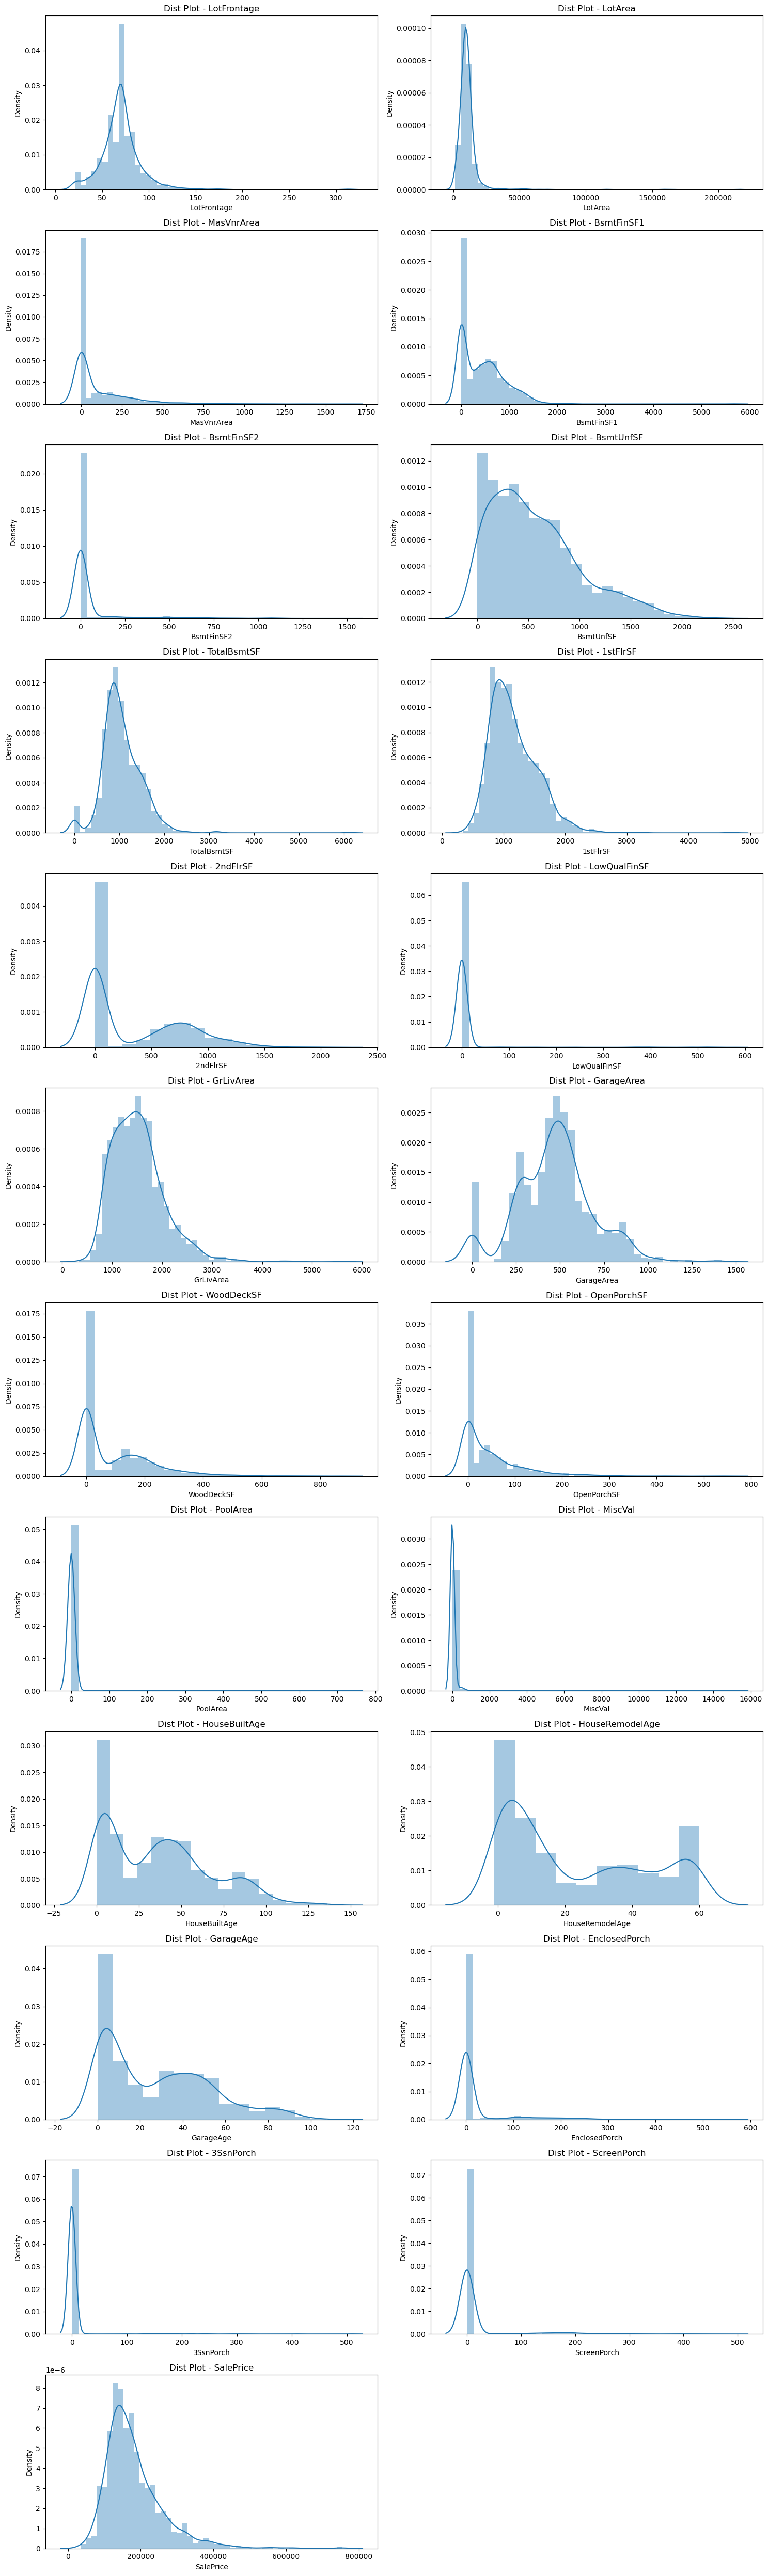

In [30]:
# Visualize skewness in numerical features
target_col = numColumns
a = (len(numColumns)//2) + 1
b = 2
c= 1

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 50)
for i in target_col:
    
    plt.subplot(a, b, c)
    plt.title('Dist Plot - {}'.format(i))
    plt.xlabel(i)
    sns.distplot(df[i])
    c= c+1
    
plt.tight_layout()
plt.show();

In [31]:
#Check for numerical info
numData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   LotFrontage      1460 non-null   float64
 1   LotArea          1460 non-null   int64  
 2   MasVnrArea       1460 non-null   float64
 3   BsmtFinSF1       1460 non-null   int64  
 4   BsmtFinSF2       1460 non-null   int64  
 5   BsmtUnfSF        1460 non-null   int64  
 6   TotalBsmtSF      1460 non-null   int64  
 7   1stFlrSF         1460 non-null   int64  
 8   2ndFlrSF         1460 non-null   int64  
 9   LowQualFinSF     1460 non-null   int64  
 10  GrLivArea        1460 non-null   int64  
 11  GarageArea       1460 non-null   int64  
 12  WoodDeckSF       1460 non-null   int64  
 13  OpenPorchSF      1460 non-null   int64  
 14  PoolArea         1460 non-null   int64  
 15  MiscVal          1460 non-null   int64  
 16  HouseBuiltAge    1460 non-null   int64  
 17  HouseRemodelAg

### Observation:
Above metric shows the skewness in data and it needs to be handled.
Applying log transform to handle the skewness.
Performing log transforms for data which has skew more than 0.5. i.e. high skewed data.
We can ignore SalePrice for now, as it is Target variable. This will be handled separately.

In [32]:
# Drop the SalePrice - Target Variable from skew Series
skew_in_vars = skew_in_vars.drop('SalePrice')

### Transforming the X- Feature (Log tranformation)

In [33]:
#Print columns which skew more than 0.5
high_skew = skew_in_vars[skew_in_vars > 0.5]
skew_index = high_skew.index
skew_index

Index(['LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'WoodDeckSF', 'OpenPorchSF', 'PoolArea', 'MiscVal', 'HouseBuiltAge',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch'],
      dtype='object')

In [34]:
#Apply log transformation where columns skew more than 0.5
for i in skew_index:
    numData[i] = np.log1p(numData[i])
    
numData.apply(lambda x: x.skew()).sort_values(ascending=False)

PoolArea           14.363102
3SsnPorch           7.734975
LowQualFinSF        7.460317
MiscVal             5.170704
ScreenPorch         3.150409
BsmtFinSF2          2.523694
EnclosedPorch       2.112275
SalePrice           1.882876
MasVnrArea          0.503532
HouseRemodelAge     0.502489
2ndFlrSF            0.289643
GarageArea          0.179981
WoodDeckSF          0.153537
1stFlrSF            0.080114
GrLivArea          -0.006140
OpenPorchSF        -0.023397
LotArea            -0.137404
BsmtFinSF1         -0.618410
GarageAge          -0.630045
HouseBuiltAge      -0.843471
LotFrontage        -0.891977
BsmtUnfSF          -2.186504
TotalBsmtSF        -5.154670
dtype: float64

In [35]:
# Log Transformation of SalePrice

df['SalePrice_log'] = np.log(df['SalePrice'])

salePrice = df[['SalePrice']].copy()
df = df.drop('SalePrice',axis=1) # removing the Target variable

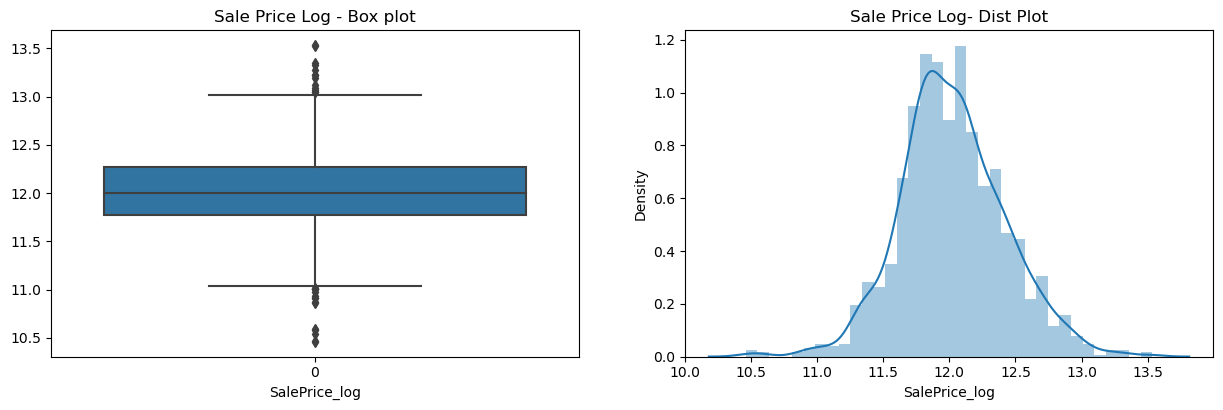

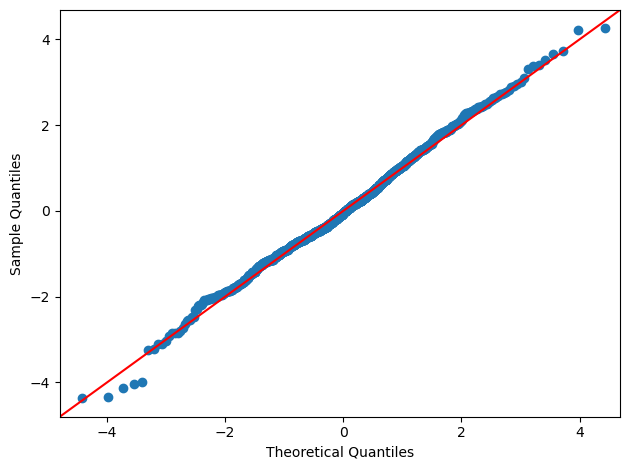

In [36]:
# Visualize the 'SalePrice' column after log transform
target_col = ['SalePrice_log']

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 50)

for i in target_col:
    plt.subplot(10, 2, 1)
    plt.title('Sale Price Log - Box plot')
    plt.xlabel(i)
    sns.boxplot(df[i])
    
    plt.subplot(10, 2, 2)
    plt.title('Sale Price Log- Dist Plot')
    plt.xlabel(i)
    sns.distplot(df[i])
    
    sm.qqplot(df[i], stats.t, distargs=(4,),fit=True, line="45")
    
plt.tight_layout()
plt.show();

### SalePrice skewness is handled now and all the plot shows the same.
- Box plot: Its symmetrical along median.
- Dist plot: Data shows normally distributed.
- QQ plot: Spread shows linear in nature.

In [37]:
# Add Target variable (LOG) to numerical DataFrame
numData = pd.concat([numData, df[['SalePrice_log']]],axis=1)
numData.head()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0     4.189655  9.042040    5.283204    6.561031         0.0   5.017280   
1     4.394449  9.169623    0.000000    6.886532         0.0   5.652489   
2     4.234107  9.328212    5.093750    6.188264         0.0   6.075346   
3     4.110874  9.164401    0.000000    5.379897         0.0   6.293419   
4     4.442651  9.565284    5.860786    6.486161         0.0   6.196444   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  PoolArea  MiscVal  \
0     6.753438  6.753438  6.751101           0.0  ...       0.0      0.0   
1     7.141245  7.141245  0.000000           0.0  ...       0.0      0.0   
2     6.825460  6.825460  6.765039           0.0  ...       0.0      0.0   
3     6.629363  6.869014  6.629363           0.0  ...       0.0      0.0   
4     7.044033  7.044033  6.960348           0.0  ...       0.0      0.0   

   HouseBuiltAge  HouseRemodelAge  GarageAge  EnclosedPorch  3SsnPorch  \
0       1.791759                5   1.791759       0.000000        0.0   
1       3.465736               31   3.465736       0.000000        0.0   
2       2.079442                6   2.079442       0.000000        0.0   
3       4.521789               36   2.197225       5.609472        0.0   
4       2.197225                8   2.197225       0.000000        0.0   

   ScreenPorch  SalePrice  SalePrice_log  
0          0.0     208500      12.247694  
1          0.0     181500      12.109011  
2          0.0     223500      12.317167  
3          0.0     140000      11.849398  
4          0.0     250000      12.429216  

[5 rows x 24 columns]

In [38]:
# Drop 'SalePrice' variable from numerical DataFrame and numerical Columns List as we have new column with transformed value
numData = numData.drop('SalePrice', axis = 1)
numColumns.remove('SalePrice')

numData.head()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0     4.189655  9.042040    5.283204    6.561031         0.0   5.017280   
1     4.394449  9.169623    0.000000    6.886532         0.0   5.652489   
2     4.234107  9.328212    5.093750    6.188264         0.0   6.075346   
3     4.110874  9.164401    0.000000    5.379897         0.0   6.293419   
4     4.442651  9.565284    5.860786    6.486161         0.0   6.196444   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  OpenPorchSF  PoolArea  \
0     6.753438  6.753438  6.751101           0.0  ...     4.127134       0.0   
1     7.141245  7.141245  0.000000           0.0  ...     0.000000       0.0   
2     6.825460  6.825460  6.765039           0.0  ...     3.761200       0.0   
3     6.629363  6.869014  6.629363           0.0  ...     3.583519       0.0   
4     7.044033  7.044033  6.960348           0.0  ...     4.442651       0.0   

   MiscVal  HouseBuiltAge  HouseRemodelAge  GarageAge  EnclosedPorch  \
0      0.0       1.791759                5   1.791759       0.000000   
1      0.0       3.465736               31   3.465736       0.000000   
2      0.0       2.079442                6   2.079442       0.000000   
3      0.0       4.521789               36   2.197225       5.609472   
4      0.0       2.197225                8   2.197225       0.000000   

   3SsnPorch  ScreenPorch  SalePrice_log  
0        0.0          0.0      12.247694  
1        0.0          0.0      12.109011  
2        0.0          0.0      12.317167  
3        0.0          0.0      11.849398  
4        0.0          0.0      12.429216  

[5 rows x 23 columns]

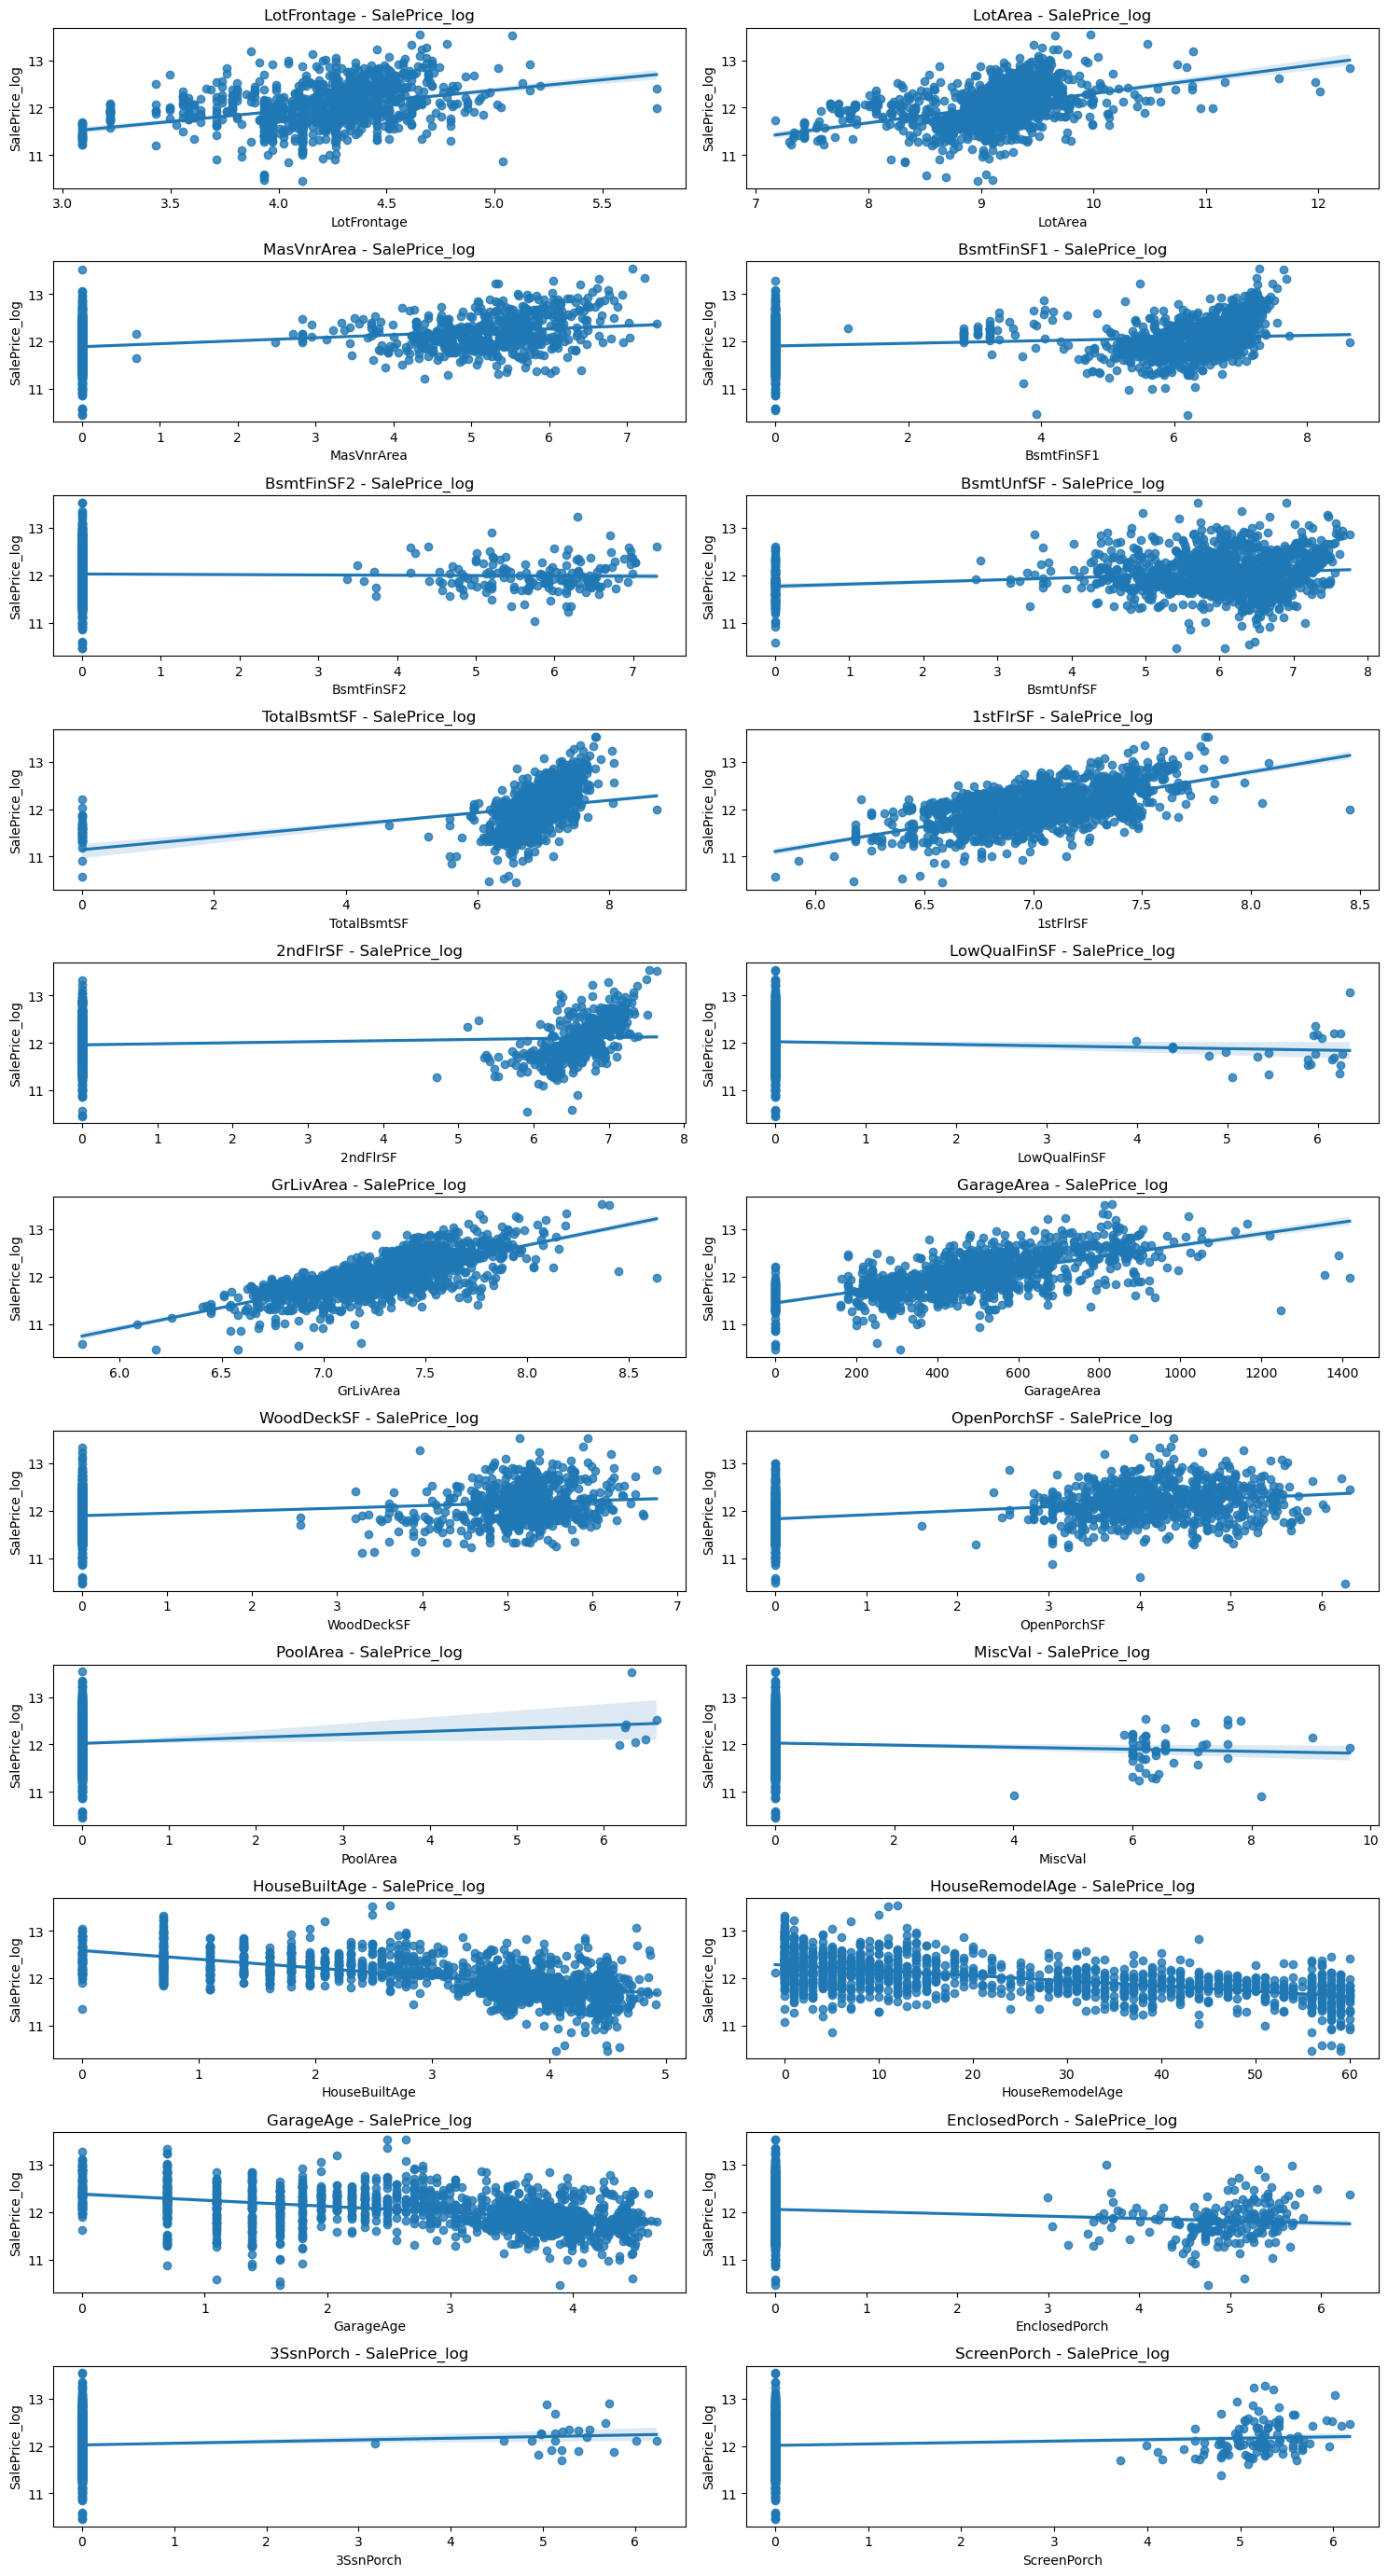

In [39]:
# Create scatter plot to check column relation with target variable
a = 40
b = 2
c = 1

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 100)

for i in numColumns:
    plt.subplot(a, b, c)
    plt.title('{} - SalePrice_log'.format(i))
    plt.xlabel(i)
    sns.regplot(x=numData[i], y=numData['SalePrice_log'])
    c = c + 1

plt.tight_layout()
plt.show();

### Correlation - Heatmap (Post Log transformation on Numerical Data)

<Axes: >

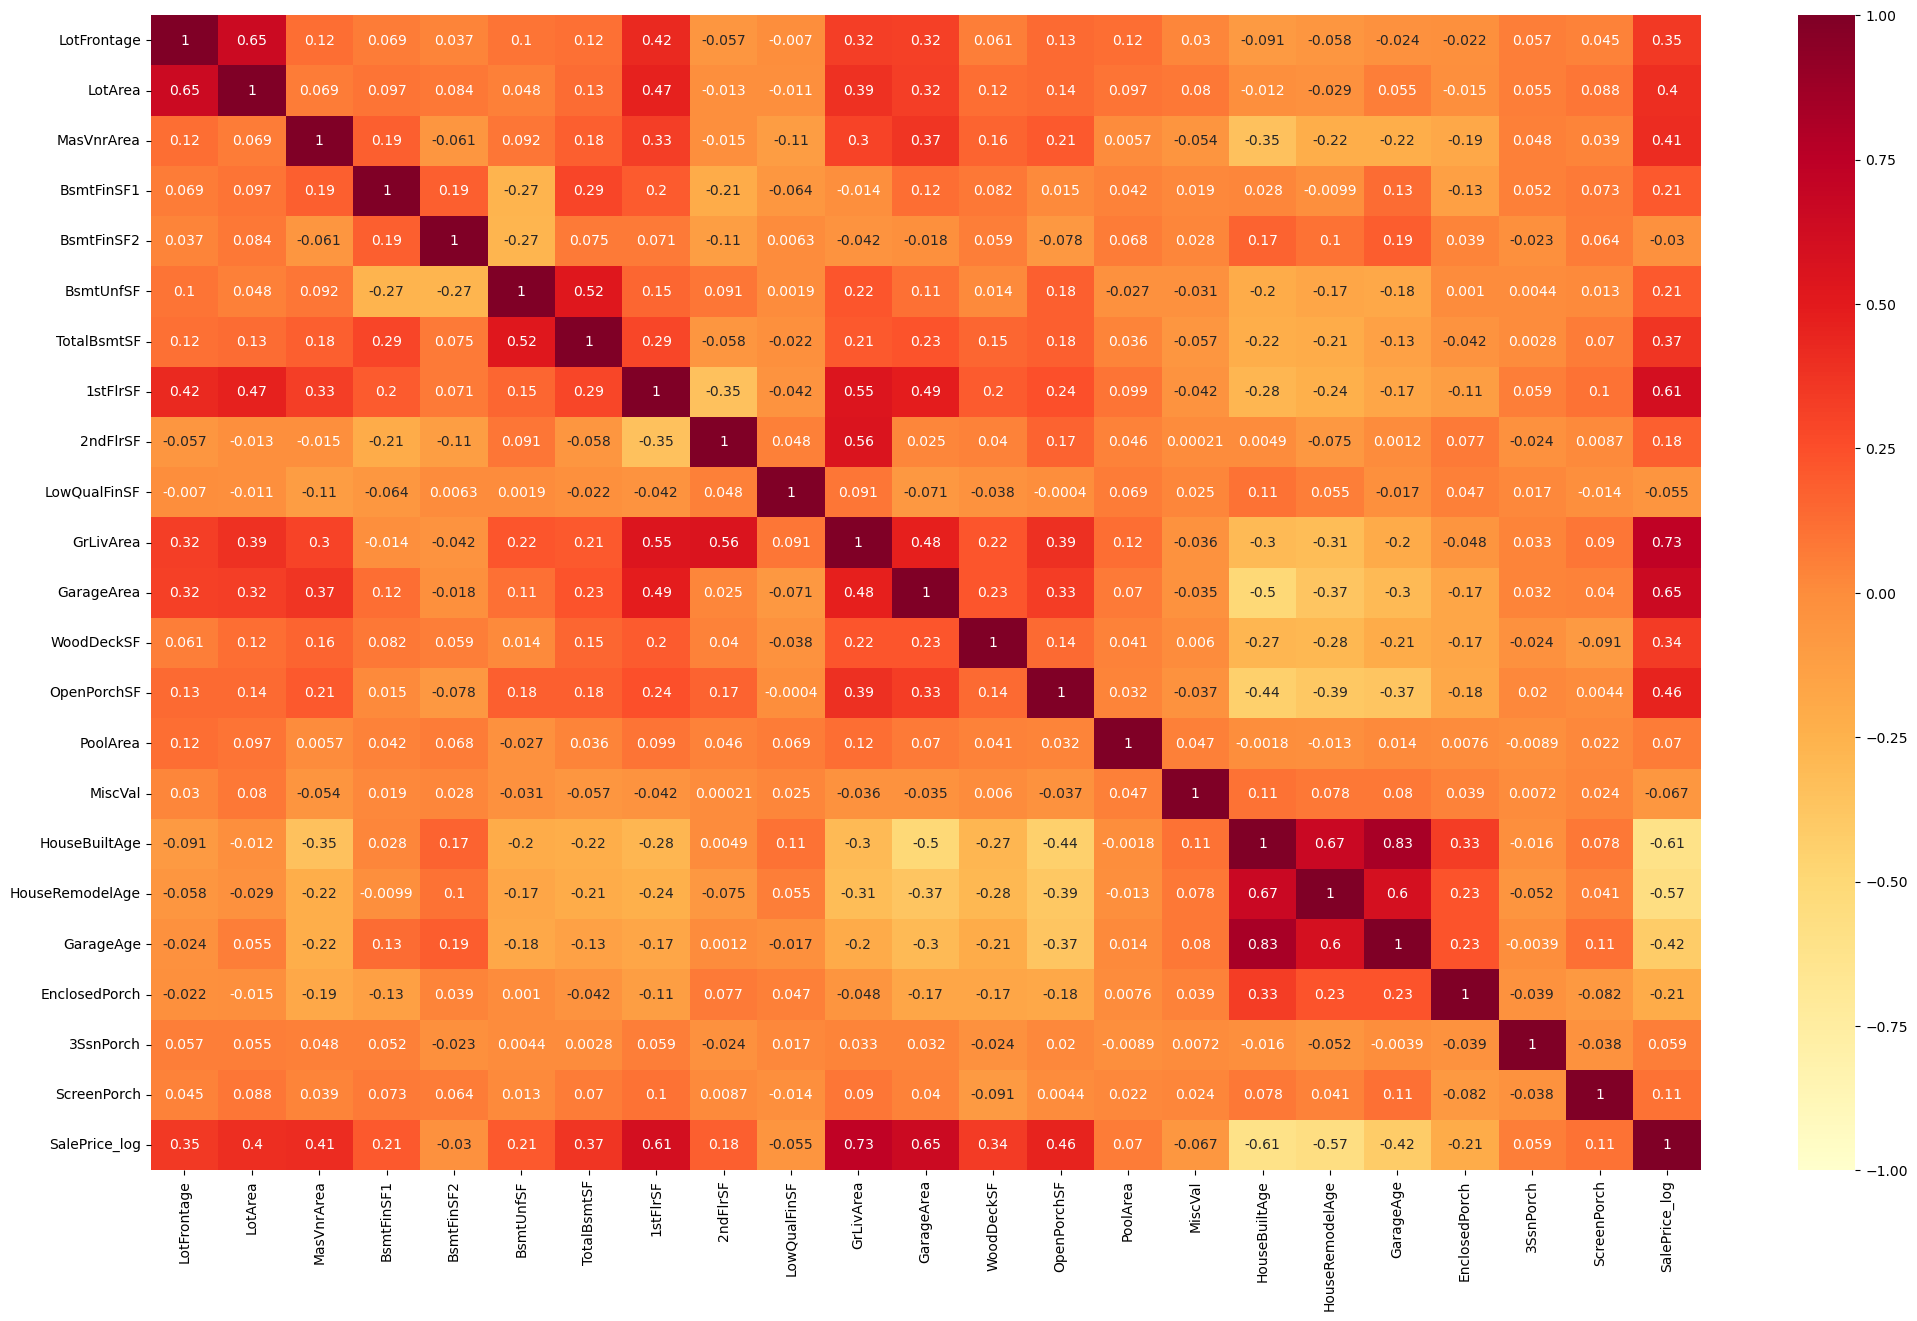

In [40]:
plt.figure(figsize=(25, 15))

sns.heatmap(numData.corr(),annot=True,vmin=-1, vmax=1, cmap='YlOrRd')

### Observation:
- SalePrice_log is highly correlated with GrLivArea, GarageArea, 1stFlrSF, OpenPorchSF, MasVnrArea and LotArea (> 0.4)
- SalePrice_log is negatively correlated with HouseBuiltAge, HouseRemodelAge, garageAge

These findings are similar to earlier inference from actual dataFrame

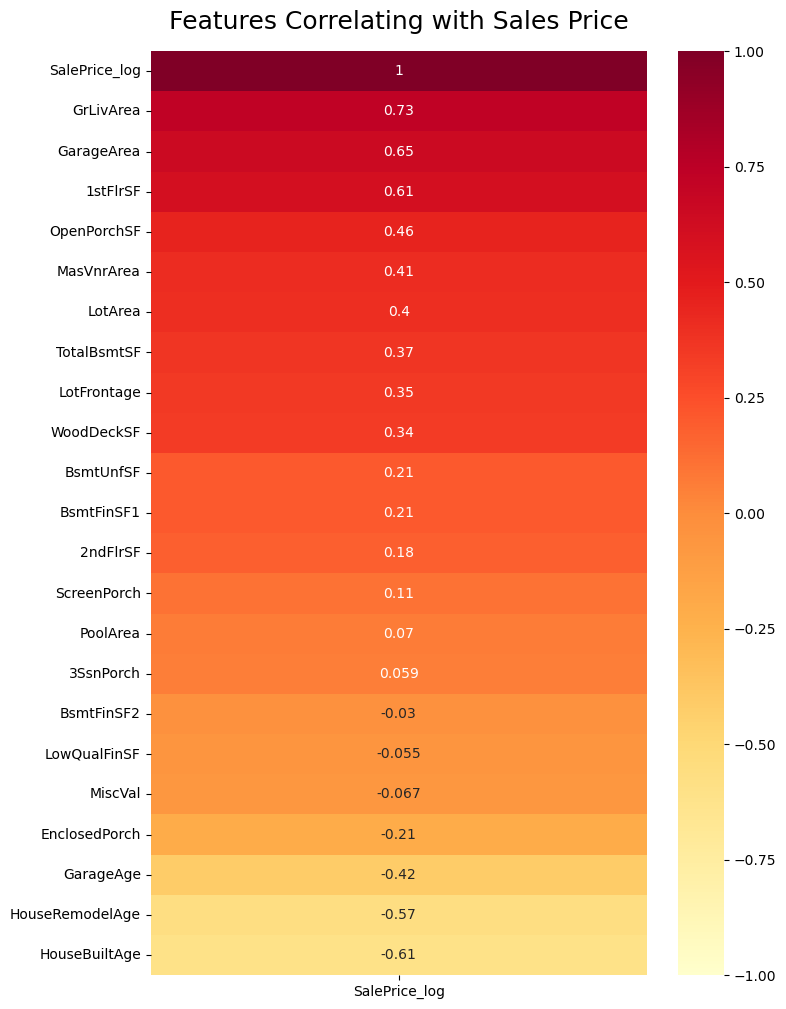

In [41]:
#Create correlation matrix in single column to get more clear view
plt.figure(figsize=(8, 12))
heatmap_outputvar = sns.heatmap(numData.corr()[['SalePrice_log']].sort_values(by='SalePrice_log', ascending=False), vmin=-1, vmax=1, annot=True, cmap='YlOrRd')
heatmap_outputvar.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

### Select the numerical columns that have correlation value of more than 0.2 with the target variable

In [42]:
#Create a temporary dataframe for the columns where correlation value is greater than 0.2
numDataCorr = numData.corr()
topNumDataCorr = numDataCorr.index[abs(numDataCorr['SalePrice_log']) > 0.2]
topNumDataCorr

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'HouseBuiltAge', 'HouseRemodelAge', 'GarageAge',
       'EnclosedPorch', 'SalePrice_log'],
      dtype='object')

In [43]:
# Check the shape of numeric dataframe
numDF_New = numData[topNumDataCorr]
numDF_New.shape

(1460, 16)

In [44]:
# Check 1st 5 rows of numeric dataframe
numDF_New.head()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0     4.189655  9.042040    5.283204    6.561031   5.017280     6.753438   
1     4.394449  9.169623    0.000000    6.886532   5.652489     7.141245   
2     4.234107  9.328212    5.093750    6.188264   6.075346     6.825460   
3     4.110874  9.164401    0.000000    5.379897   6.293419     6.629363   
4     4.442651  9.565284    5.860786    6.486161   6.196444     7.044033   

   1stFlrSF  GrLivArea  GarageArea  WoodDeckSF  OpenPorchSF  HouseBuiltAge  \
0  6.753438   7.444833         548    0.000000     4.127134       1.791759   
1  7.141245   7.141245         460    5.700444     0.000000       3.465736   
2  6.825460   7.488294         608    0.000000     3.761200       2.079442   
3  6.869014   7.448916         642    0.000000     3.583519       4.521789   
4  7.044033   7.695758         836    5.262690     4.442651       2.197225   

   HouseRemodelAge  GarageAge  EnclosedPorch  SalePrice_log  
0                5   1.791759       0.000000      12.247694  
1               31   3.465736       0.000000      12.109011  
2                6   2.079442       0.000000      12.317167  
3               36   2.197225       5.609472      11.849398  
4                8   2.197225       0.000000      12.429216

### Categorical Data Preparation

In [45]:
# Create temporary dataframe to prepare categorical data
catCols_New = df.select_dtypes(include=object).columns.tolist()
catCols_New

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [46]:
# Create temporary dataframe to prepare categorical data
catData_New = df[catCols_New]
catData_New.shape

(1460, 51)

In [47]:
# Check all the features info of the categorical dataframe
catData_New.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   object
 1   MSZoning       1460 non-null   object
 2   Street         1460 non-null   object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  OverallQual    1460 non-null   object
 14  OverallCond    1460 non-null   object
 15  RoofStyle      1460 non-null   object
 16  RoofMatl       1460 non-null   object
 17  Exterior1st    1460 non-null   object
 18  Exterior2nd    1460 non-null

In [48]:
#Print 1st 5 rows of the categorical dataframe
catData_New.head()

MSSubClass MSZoning Street LotShape LandContour  \
0             2-STORY 1946 & NEWER       RL   Pave      Reg         Lvl   
1  1-STORY 1946 & NEWER ALL STYLES       RL   Pave      Reg         Lvl   
2             2-STORY 1946 & NEWER       RL   Pave      IR1         Lvl   
3             2-STORY 1945 & OLDER       RL   Pave      IR1         Lvl   
4             2-STORY 1946 & NEWER       RL   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1  ... GarageType  \
0    AllPub    Inside       Gtl      CollgCr       Norm  ...     Attchd   
1    AllPub       FR2       Gtl      Veenker      Feedr  ...     Attchd   
2    AllPub    Inside       Gtl      CollgCr       Norm  ...     Attchd   
3    AllPub    Corner       Gtl      Crawfor       Norm  ...     Detchd   
4    AllPub       FR2       Gtl      NoRidge       Norm  ...     Attchd   

  GarageFinish GarageCars GarageQual GarageCond PavedDrive MoSold YrSold  \
0          RFn          2         TA         TA          Y    Feb   2008   
1          RFn          2         TA         TA          Y    May   2007   
2          RFn          2         TA         TA          Y    Sep   2008   
3          Unf          3         TA         TA          Y    Feb   2006   
4          RFn          3         TA         TA          Y    Dec   2008   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal  

[5 rows x 51 columns]

In [49]:
# Add Target variable to categorical DataFrame
catData_New = pd.concat([catData_New,numDF_New[['SalePrice_log']]],axis=1)
catData_New.head()

MSSubClass MSZoning Street LotShape LandContour  \
0             2-STORY 1946 & NEWER       RL   Pave      Reg         Lvl   
1  1-STORY 1946 & NEWER ALL STYLES       RL   Pave      Reg         Lvl   
2             2-STORY 1946 & NEWER       RL   Pave      IR1         Lvl   
3             2-STORY 1945 & OLDER       RL   Pave      IR1         Lvl   
4             2-STORY 1946 & NEWER       RL   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1  ... GarageFinish  \
0    AllPub    Inside       Gtl      CollgCr       Norm  ...          RFn   
1    AllPub       FR2       Gtl      Veenker      Feedr  ...          RFn   
2    AllPub    Inside       Gtl      CollgCr       Norm  ...          RFn   
3    AllPub    Corner       Gtl      Crawfor       Norm  ...          Unf   
4    AllPub       FR2       Gtl      NoRidge       Norm  ...          RFn   

  GarageCars GarageQual GarageCond PavedDrive MoSold YrSold SaleType  \
0          2         TA         TA          Y    Feb   2008       WD   
1          2         TA         TA          Y    May   2007       WD   
2          2         TA         TA          Y    Sep   2008       WD   
3          3         TA         TA          Y    Feb   2006       WD   
4          3         TA         TA          Y    Dec   2008       WD   

  SaleCondition SalePrice_log  
0        Normal     12.247694  
1        Normal     12.109011  
2        Normal     12.317167  
3       Abnorml     11.849398  
4        Normal     12.429216  

[5 rows x 52 columns]

In [50]:
# Check shape of the categorical dataframe after concatenation
catData_New.shape

(1460, 52)

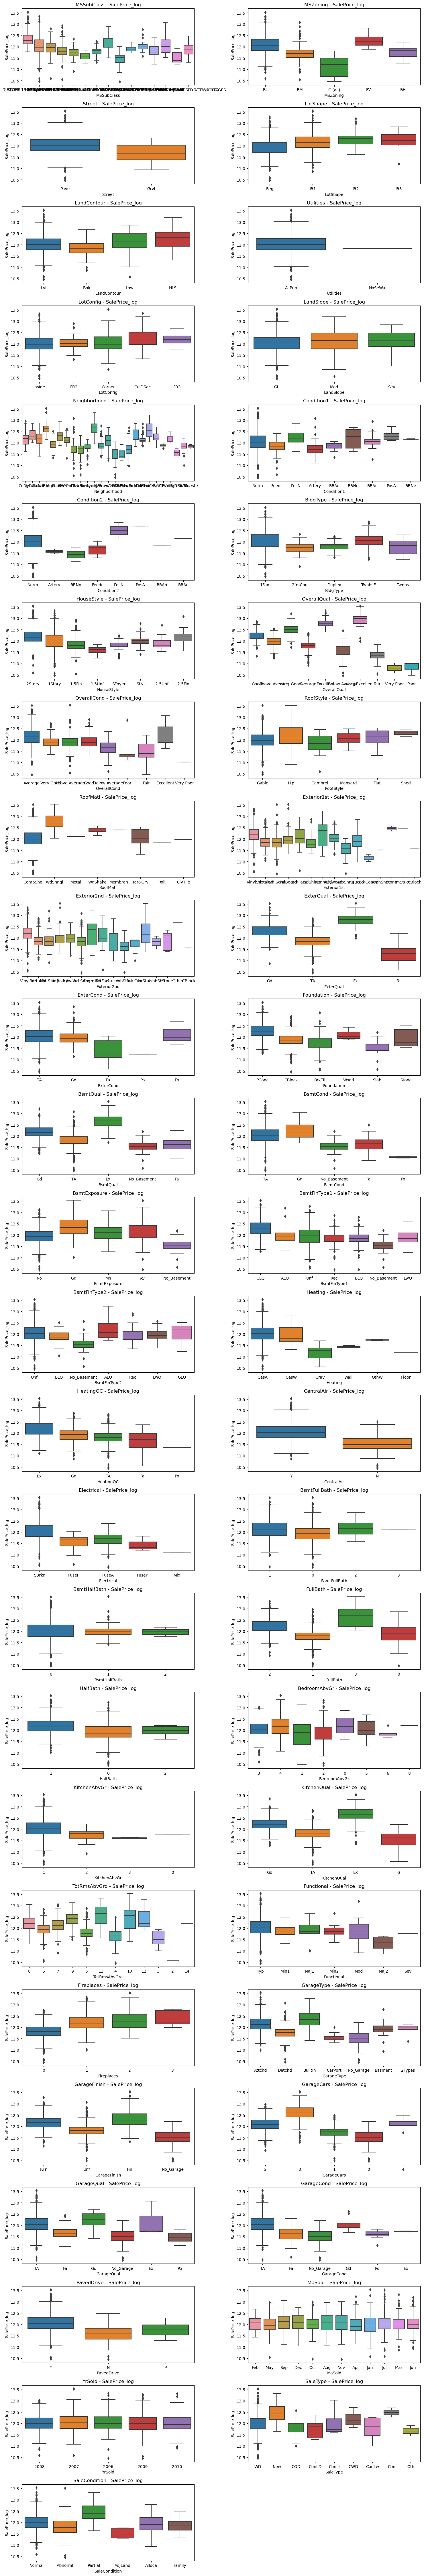

In [51]:
##Create box plot of features with respect to target variable
a = 29
b = 2
c = 1


fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 100)

for i in catCols_New:
    plt.subplot(a, b, c)
    plt.title('{} - SalePrice_log'.format(i))
    plt.xlabel(i)
    sns.boxplot(x=catData_New[i], y=catData_New['SalePrice_log'])
    c = c + 1

plt.tight_layout()
plt.show();

### Encode the Categorical Features

In [52]:
#Add dummy features for categorical variable 
catData_New = pd.get_dummies(catData_New, dtype=int, drop_first = True)
catData_New.shape

(1460, 287)

In [53]:
# Check 1st 5 rows of the dataframe after dummy inclusion
catData_New.head()

SalePrice_log  MSSubClass_1-1/2 STORY FINISHED ALL AGES  \
0      12.247694                                         0   
1      12.109011                                         0   
2      12.317167                                         0   
3      11.849398                                         0   
4      12.429216                                         0   

   MSSubClass_1-STORY 1945 & OLDER  \
0                                0   
1                                0   
2                                0   
3                                0   
4                                0   

   MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
0                                           0   
1                                           1   
2                                           0   
3                                           0   
4                                           0   

   MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  \
0                                                  0                  
1                                                  0                  
2                                                  0                  
3                                                  0                  
4                                                  0                  

   MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   MSSubClass_2-1/2 STORY ALL AGES  MSSubClass_2-STORY 1945 & OLDER  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                1   
4                                0                                0   

   MSSubClass_2-STORY 1946 & NEWER  ...  SaleType_ConLI  SaleType_ConLw  \
0                                1  ...               0               0   
1                                0  ...               0               0   
2                                1  ...               0               0   
3                                0  ...               0               0   
4                                1  ...               0               0   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  \
0             0             0            1                      0   
1             0             0            1                      0   
2             0             0            1                      0   
3             0             0            1                      0   
4             0             0            1                      0   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                     0                     0                     1   
1                     0                     0                     1   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     1   

   SaleCondition_Partial  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 287 columns]

### Merge categorical and numerical dataframe to get Final dataframe

In [54]:
# Drop 'SalePrice_log' to remove duplicate
catData_New = catData_New.drop('SalePrice_log', axis = 1)
catData_New.head()

MSSubClass_1-1/2 STORY FINISHED ALL AGES  MSSubClass_1-STORY 1945 & OLDER  \
0                                         0                                0   
1                                         0                                0   
2                                         0                                0   
3                                         0                                0   
4                                         0                                0   

   MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
0                                           0   
1                                           1   
2                                           0   
3                                           0   
4                                           0   

   MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  \
0                                                  0                  
1                                                  0                  
2                                                  0                  
3                                                  0                  
4                                                  0                  

   MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   MSSubClass_2-1/2 STORY ALL AGES  MSSubClass_2-STORY 1945 & OLDER  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                1   
4                                0                                0   

   MSSubClass_2-STORY 1946 & NEWER  MSSubClass_2-STORY PUD - 1946 & NEWER  \
0                                1                                      0   
1                                0                                      0   
2                                1                                      0   
3                                0                                      0   
4                                1                                      0   

   ...  SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
0  ...               0               0             0             0   
1  ...               0               0             0             0   
2  ...               0               0             0             0   
3  ...               0               0             0             0   
4  ...               0               0             0             0   

   SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
0            1                      0                     0   
1            1                      0                     0   
2            1                      0                     0   
3            1                      0                     0   
4            1                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 286 columns

In [55]:
# Merge categorical and numerical dataframe with main to get Final dataframe
df =  pd.concat([df[['Id']],catData_New,numDF_New],axis=1)
df.shape

(1460, 303)

In [56]:
# Drop 'Id' as it is just for indexing purpose and won't impact any outcome
df = df.drop('Id', axis = 1)
df.head()

MSSubClass_1-1/2 STORY FINISHED ALL AGES  MSSubClass_1-STORY 1945 & OLDER  \
0                                         0                                0   
1                                         0                                0   
2                                         0                                0   
3                                         0                                0   
4                                         0                                0   

   MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
0                                           0   
1                                           1   
2                                           0   
3                                           0   
4                                           0   

   MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  \
0                                                  0                  
1                                                  0                  
2                                                  0                  
3                                                  0                  
4                                                  0                  

   MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   MSSubClass_2-1/2 STORY ALL AGES  MSSubClass_2-STORY 1945 & OLDER  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                1   
4                                0                                0   

   MSSubClass_2-STORY 1946 & NEWER  MSSubClass_2-STORY PUD - 1946 & NEWER  \
0                                1                                      0   
1                                0                                      0   
2                                1                                      0   
3                                0                                      0   
4                                1                                      0   

   ...  1stFlrSF  GrLivArea  GarageArea  WoodDeckSF  OpenPorchSF  \
0  ...  6.753438   7.444833         548    0.000000     4.127134   
1  ...  7.141245   7.141245         460    5.700444     0.000000   
2  ...  6.825460   7.488294         608    0.000000     3.761200   
3  ...  6.869014   7.448916         642    0.000000     3.583519   
4  ...  7.044033   7.695758         836    5.262690     4.442651   

   HouseBuiltAge  HouseRemodelAge  GarageAge  EnclosedPorch  SalePrice_log  
0       1.791759                5   1.791759       0.000000      12.247694  
1       3.465736               31   3.465736       0.000000      12.109011  
2       2.079442                6   2.079442       0.000000      12.317167  
3       4.521789               36   2.197225       5.609472      11.849398  
4       2.197225                8   2.197225       0.000000      12.429216  

[5 rows x 302 columns]

# Train-Test Split

In [57]:
# Split the dataframe in train and test set in (75,25)

from sklearn.model_selection import train_test_split, GridSearchCV

train, test = train_test_split(df, train_size = 0.75, test_size = 0.25, random_state = 25)

In [58]:
# Remove target variable from both train and test set
y_train = train['SalePrice_log']
X_train = train.drop("SalePrice_log", axis = 1)

y_test= test['SalePrice_log']
X_test = test.drop('SalePrice_log', axis = 1)

In [59]:
# Print shape for all the train and test dataframe
print('X train shape',X_train.shape)
print('X test shape',X_test.shape)
print('y train shape',y_train.shape)
print('y test shape',y_test.shape)

X train shape (1095, 301)
X test shape (365, 301)
y train shape (1095,)
y test shape (365,)


In [60]:
# Print 1st 5 rows of 'y_train'
print(y_train.head())

1276    11.995352
1217    12.343467
1036    12.661914
1320    11.960811
80      12.173033
Name: SalePrice_log, dtype: float64


In [61]:
# Print 1st 5 rows of 'y_test'
print(y_test.head())

932     12.676076
409     12.735965
1271    12.132157
270     12.491252
1290    12.103486
Name: SalePrice_log, dtype: float64


### Linear Regression - Model Building

In [62]:
# Building a Linear Regression model.
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [63]:
# Run the RFE with the output number of the variable equal to 65
from sklearn.feature_selection import RFE
rfe = RFE(reg, n_features_to_select=65)
rfe = rfe.fit(X_train, y_train)

In [64]:
#Print Columns selected by RFE.
rfe_col=X_train.columns[rfe.support_]
rfe_col

Index(['MSSubClass_DUPLEX - ALL STYLES AND AGES', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LotConfig_FR3', 'Neighborhood_Crawfor',
       'Neighborhood_StoneBr', 'Condition1_RRNn', 'Condition2_PosA',
       'Condition2_PosN', 'Condition2_RRNn', 'BldgType_Duplex',
       'OverallQual_Excellent', 'OverallQual_Fair',
       'OverallQual_Very Excellent', 'OverallQual_Very Good',
       'OverallQual_Very Poor', 'OverallCond_Fair', 'OverallCond_Very Poor',
       'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior2nd_CBlock',
       'Foundation_Stone', 'BsmtQual_No_Basement', 'BsmtCond_No_Basement',
       'BsmtExposure_Gd', 'BsmtExposure_No_Basement',
       'BsmtFinType1_No_Basement', 'BsmtFinType2_No_Basement', 'Heating_GasW',
       'CentralAir_Y', 'BsmtFullBath_2', 'BsmtFullBath_3', 'KitchenQual_Fa',
       'KitchenQual_TA', 'TotR

In [65]:
# Create X_train dataframe with RFE selected variables
X_train_new=X_train[rfe_col]
X_train_new = sm.add_constant(X_train_new)

#create first model
lr=sm.OLS(y_train,X_train_new)

#fit the model
lr_model=lr.fit()

#Print the summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SalePrice_log   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     163.7
Date:                Tue, 21 May 2024   Prob (F-statistic):               0.00
Time:                        22:59:48   Log-Likelihood:                 713.88
No. Observations:                1095   AIC:                            -1314.
Df Residuals:                    1038   BIC:                            -1029.
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       5.3351      0.246     21.664      0.000       4.852       5.818
MSSubClass_DUPLEX - ALL STYLES AND AGES    -0.0749      0.013     -5.705      0.000      -0.101      -0.049
MSZoning_FV                                 0.5150      0.061      8.491      0.000       0.396       0.634
MSZoning_RH                                 0.4566      0.070      6.552      0.000       0.320       0.593
MSZoning_RL                                 0.4651      0.057      8.155      0.000       0.353       0.577
MSZoning_RM                                 0.3421      0.057      5.968      0.000       0.230       0.455
LotConfig_FR3                              -0.1062      0.100     -1.064      0.288      -0.302       0.090
Neighborhood_Crawfor                        0.1826      0.022      8.232      0.000       0.139       0.226
Neighborhood_StoneBr                        0.1027      0.031      3.308      0.001       0.042       0.164
Condition1_RRNn                             0.1314      0.072      1.833      0.067      -0.009       0.272
Condition2_PosA                             0.1133      0.146      0.775      0.438      -0.173       0.400
Condition2_PosN                            -0.5817      0.104     -5.587      0.000      -0.786      -0.377
Condition2_RRNn                             0.1954      0.094      2.076      0.038       0.011       0.380
BldgType_Duplex                            -0.0749      0.013     -5.705      0.000      -0.101      -0.049
OverallQual_Excellent                       0.3063      0.029     10.731      0.000       0.250       0.362
OverallQual_Fair                           -0.1394      0.038     -3.670      0.000      -0.214      -0.065
OverallQual_Very Excellent                  0.3026      0.048      6.242      0.000       0.207       0.398
OverallQual_Very Good                       0.1274      0.015      8.235      0.000       0.097       0.158
OverallQual_Very Poor                      -0.1548      0.068     -2.290      0.022      -0.287      -0.022
OverallCond_Fair                           -0.1745      0.034     -5.094      0.000      -0.242      -0.107
OverallCond_Very Poor                      -0.1548      0.068     -2.290      0.022      -0.287      -0.022
RoofStyle_Shed                             -0.0960      0.133     -0.720      0.472      -0.358       0.166
RoofMatl_CompShg                            1.6382      0.146     11.196      0.000       1.351       1.925
RoofMatl_Roll                               1.5262      0.199      7.688      0.000       1.137       1.916
RoofMatl_Tar&Grv                            1.6653      0.152     10.923      0.000       1.366       1.964
RoofMatl_WdShake                            1.6755      0.1

### Observation:

R2 Score is 0.898 and Adj. R2_Score is 0.893.

### Ridge Regression - Model Building

In [66]:
# List of alphas to tune

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [67]:
# Print best alpha and its score
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 6.0}
-0.08638463461986332


In [68]:
# Check cross validation for all the sets
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.014884      0.003497         0.006285    1.463083e-03      0.0001   
1        0.011742      0.000937         0.004421    7.835306e-04       0.001   
2        0.013742      0.002493         0.005701    1.177030e-03        0.01   
3        0.013294      0.003864         0.004873    6.843073e-04        0.05   
4        0.011305      0.000554         0.004587    4.872164e-04         0.1   
5        0.013167      0.002778         0.005183    1.164422e-03         0.2   
6        0.012024      0.000601         0.004112    6.304321e-04         0.3   
7        0.012966      0.002602         0.004587    7.964259e-04         0.4   
8        0.012158      0.001574         0.004455    5.868198e-04         0.5   
9        0.011813      0.000787         0.005025    6.513030e-04         0.6   
10       0.012596      0.003179         0.004925    1.199498e-04         0.7   
11       0.013763      0.003080         0.006050    1.213864e-03         0.8   
12       0.012073      0.001019         0.004187    3.988271e-04         0.9   
13       0.013963      0.003396         0.005888    9.124890e-04         1.0   
14       0.012597      0.001856         0.004299    5.808834e-04         2.0   
15       0.014618      0.003754         0.004902    1.645288e-03         3.0   
16       0.012263      0.000404         0.004387    7.976295e-04         4.0   
17       0.013759      0.001517         0.006735    1.829006e-03         5.0   
18       0.014187      0.003211         0.004803    1.393283e-03         6.0   
19       0.011356      0.000346         0.004217    4.346204e-04         7.0   
20       0.011471      0.000447         0.003989    3.504023e-07         8.0   
21       0.011171      0.000399         0.004188    3.992084e-04         9.0   
22       0.011270      0.000746         0.004389    4.891036e-04        10.0   
23       0.011769      0.000977         0.004688    3.981426e-04          20   
24       0.014197      0.002888         0.004838    1.202470e-03          50   
25       0.011518      0.000501         0.004789    7.426460e-04         100   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.098042          -0.100959   
1    {'alpha': 0.001}          -0.097756          -0.100782   
2     {'alpha': 0.01}          -0.095868          -0.099486   
3     {'alpha': 0.05}          -0.094292          -0.096464   
4      {'alpha': 0.1}          -0.094325          -0.094640   
5      {'alpha': 0.2}          -0.094611          -0.092389   
6      {'alpha': 0.3}          -0.095044          -0.090918   
7      {'alpha': 0.4}          -0.095406          -0.089874   
8      {'alpha': 0.5}          -0.095695          -0.089180   
9      {'alpha': 0.6}          -0.095965          -0.088653   
10     {'alpha': 0.7}          -0.096162          -0.088192   
11     {'alpha': 0.8}          -0.096308          -0.087815   
12     {'alpha': 0.9}          -0.096435          -0.087501   
13     {'alpha': 1.0}          -0.096545          -0.087228   
14     {'alpha': 2.0}          -0.096917          -0.085677   
15     {'alpha': 3.0}          -0.096991          -0.084876   
16     {'alpha': 4.0}          -0.096949          -0.084457   
17     {'alpha': 5.0}          -0.096869          -0.084348   
18     {'alpha': 6.0}          -0.096807          -0.084345   
19     {'alpha': 7.0}          -0.096733          -0.084370   
20     {'alpha': 8.0}          -0.096657          -0.084507   
21     {'alpha': 9.0}          -0.096585          -0.084647   
22    {'alpha': 10.0}          -0.096537          -0.084886   
23      {'alpha': 20}          -0.097369          -0.087794   
24      {'alpha': 50}          -0.102096          -0.096245   
25     {'alpha': 100}          -0.109939          -0.105698   

    split2_test_score  split3_test_score  ...  mean_test_score  \
0           -0.099049          -0.096126  ...        -0.097584   
1        

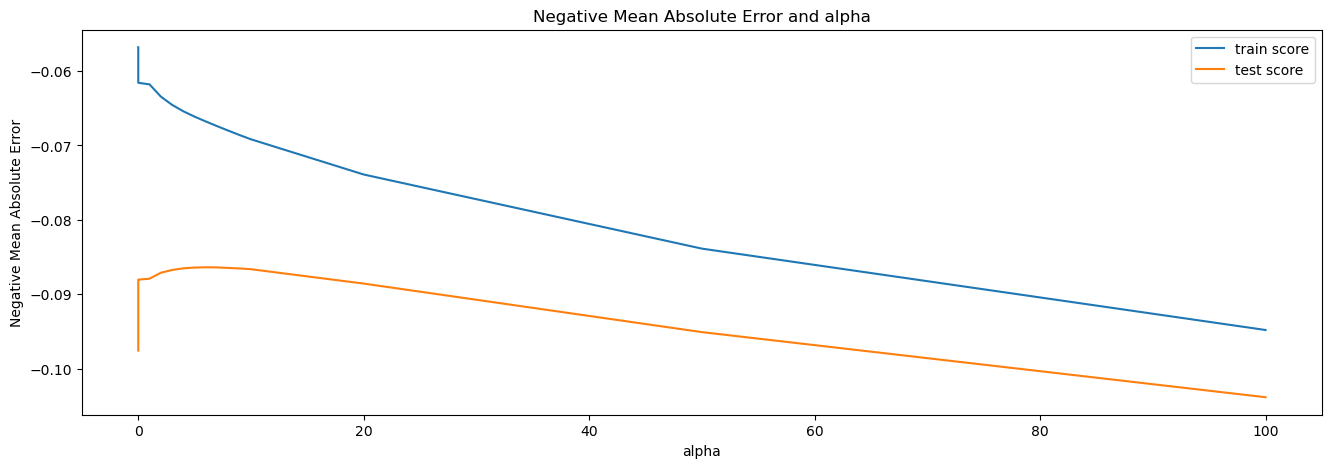

In [69]:
# Plot the mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [70]:
#Final ridge model on best alpha
alpha = 6
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-2.20061420e-02, -5.12871646e-02,  4.18739957e-02,  2.63357973e-02,
        1.05281489e-02, -4.00141672e-03,  3.31908230e-02,  1.08778698e-02,
       -1.25831201e-02, -4.73453877e-02,  1.53294423e-02, -4.14534950e-03,
        2.06978798e-02,  1.42431654e-03,  9.35845875e-02,  4.26165506e-02,
        7.73016232e-02,  4.64600512e-02,  6.59599675e-02,  4.67207308e-02,
       -3.86271882e-02,  2.41878327e-03,  6.19973745e-02,  1.65969423e-02,
        4.69048238e-02,  0.00000000e+00,  2.44545021e-02, -4.19394300e-02,
       -2.76594681e-02, -7.40865950e-03,  2.16139059e-02, -2.34380644e-02,
       -2.17970315e-03,  1.36586099e-03,  3.07523771e-02,  2.71511042e-02,
       -1.12727284e-02,  8.76725865e-02, -8.07607597e-02, -2.88514314e-02,
       -9.13330865e-02, -7.46083701e-02, -3.17701089e-02, -3.03777604e-02,
        1.53386997e-02, -2.91870237e-02,  5.22118773e-02,  7.31894504e-02,
       -5.43401673e-02, -2.38172828e-02, -1.31697805e-02, -3.01617098e-03,
        3.43795048e-02,  

### Prediction

In [71]:
# Get different performance evaluation metric

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

metric1 = []

train1_r2 = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print('R2_Score_Train: ', train1_r2)
metric1.append(train1_r2)
test1_r2 = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print('R2_Score_Test: ', test1_r2)
metric1.append(test1_r2)

rss1_train = np.sum(np.square(y_train - y_train_pred))
print('RSS_Score_Train: ', rss1_train)
metric1.append(rss1_train)
rss1_test = np.sum(np.square(y_test - y_test_pred))
print('RSS_Score_Test: ', rss1_test)
metric1.append(rss1_test)

rmse1_train = mean_squared_error(y_train, y_train_pred)
print("MSE_Train : ", rmse1_train)
metric1.append(rmse1_train)
rmse1_test = mean_squared_error(y_test, y_test_pred)
print("MSE_Test : ", rmse1_test)
metric1.append(rmse1_test)

mae1_train = mean_absolute_error(y_train, y_train_pred)
print("MAE_Train : ",mae1_train)
metric1.append(mae1_train)
mae1_test = mean_absolute_error(y_test, y_test_pred)
print("MAE_Test : ",mae1_test)
metric1.append(mae1_test)

R2_Score_Train:  0.9343901619002345
R2_Score_Test:  0.8967221235628992
RSS_Score_Train:  11.226667951406267
RSS_Score_Test:  6.339151187223044
MSE_Train :  0.010252664795804809
MSE_Test :  0.017367537499241217
MAE_Train :  0.06770013009648672
MAE_Test :  0.09111885294916232


Text(0.5, 0, 'Errors')

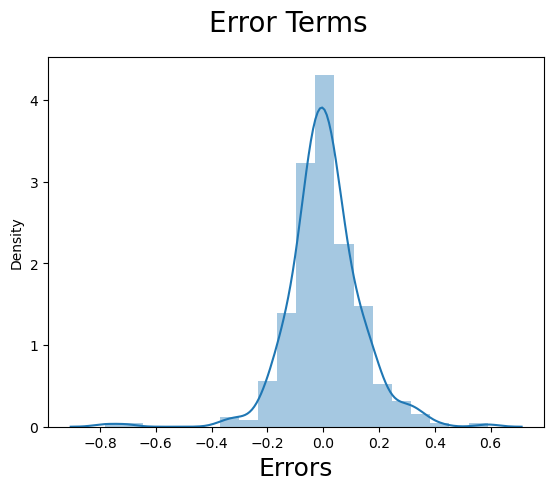

In [72]:
fig = plt.figure()
sns.distplot((y_test - y_test_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)

### Most of the values are populated at the centre (zero error) , error distribution looks fine.

Text(0.5, 0, 'Errors')

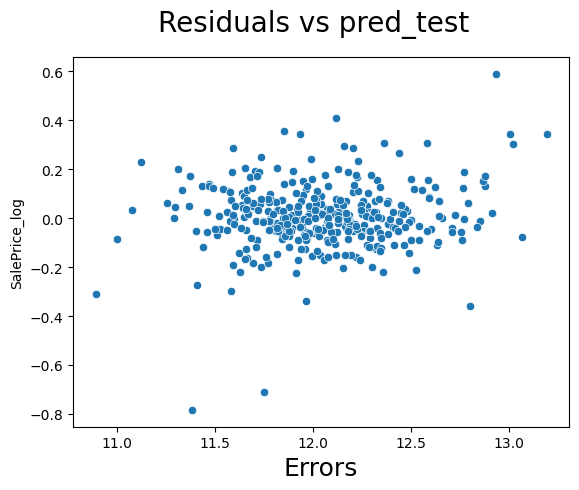

In [73]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.scatterplot(x=y_test_pred,y=(y_test - y_test_pred))
fig.suptitle('Residuals vs pred_test', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)

#### The residuals are scattered around '0'

In [74]:
main_coef1=pd.Series(ridge.coef_,index=X_train.columns)
var_selected1= sum(ridge.coef_!=0)
print("The number of feautures selected by Ridge :",var_selected1)

The number of feautures selected by Ridge : 293


### Lasso Regression - Model Building

In [75]:
# list of alphas to tune for lasso
params = {'alpha': [0.00005, 0.0001, 0.008, 0.001, 0.01]}
lasso = Lasso()

# Cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.008, 0.001, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [76]:
cv_results_l = pd.DataFrame(lasso_cv.cv_results_)

In [77]:
# Print the best alpha and its score
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 0.0001}
-0.0881859978888126


In [78]:
#Final lasso model
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [79]:
#Get different performance evaluation metric

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

metric2 = []

train1_r2 = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print('R2_Score_Train: ', train1_r2)
metric2.append(train1_r2)
test1_r2 = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print('R2_Score_Test: ', test1_r2)
metric2.append(test1_r2)

rss1_train = np.sum(np.square(y_train - y_train_pred))
print('RSS_Train: ', rss1_train)
metric2.append(rss1_train)
rss1_test = np.sum(np.square(y_test - y_test_pred))
print('RSS_Test: ', rss1_test)
metric2.append(rss1_test)

rmse1_train = mean_squared_error(y_train, y_train_pred)
print("MSE_Train : ", rmse1_train)
metric2.append(rmse1_train)
rmse1_test = mean_squared_error(y_test, y_test_pred)
print("MSE_Test : ", rmse1_test)
metric2.append(rmse1_test)

mae1_train = mean_absolute_error(y_train, y_train_pred)
print("MAE_Train : ",mae1_train)
metric2.append(mae1_train)
mae1_test = mean_absolute_error(y_test, y_test_pred)
print("MAE_Test : ",mae1_test)
metric2.append(mae1_test)

R2_Score_Train:  0.9448861511299751
R2_Score_Test:  0.8962936173776263
RSS_Train:  9.430672269712066
RSS_Test:  6.365452710713023
MSE_Train :  0.008612486091061248
MSE_Test :  0.017439596467706913
MAE_Train :  0.06400144385292715
MAE_Test :  0.09089239476889892


In [80]:
#Print coefficient values for Lasso
lasso.coef_

array([-2.63620559e-02, -2.13236949e-02,  5.23135915e-02,  2.08707527e-02,
        0.00000000e+00, -0.00000000e+00, -3.83901438e-03,  0.00000000e+00,
       -7.29841213e-03, -6.74072230e-02,  0.00000000e+00,  0.00000000e+00,
        1.61440796e-02,  0.00000000e+00,  3.94273639e-01,  3.22354398e-01,
        3.38345280e-01,  3.12536530e-01,  3.38908471e-02,  4.28240579e-02,
       -2.36998800e-02,  4.87962140e-03,  5.67940574e-02,  1.21939457e-02,
        4.47828928e-02,  0.00000000e+00,  2.59034226e-02, -4.63262064e-02,
       -1.10489487e-01, -8.72551438e-03,  2.25470745e-02, -3.77702837e-02,
       -0.00000000e+00,  0.00000000e+00,  2.40369934e-02,  2.72261406e-02,
       -1.53664268e-03,  1.02007467e-01, -8.85024201e-02, -1.48100971e-02,
       -6.87684197e-02, -1.22414853e-01, -2.85643503e-02, -3.11301604e-02,
        1.93126777e-02, -2.73291882e-02,  7.39064529e-02,  9.42047593e-02,
       -7.50570778e-02, -2.28255646e-02, -8.76500951e-03,  9.78376820e-03,
        1.50052996e-02,  

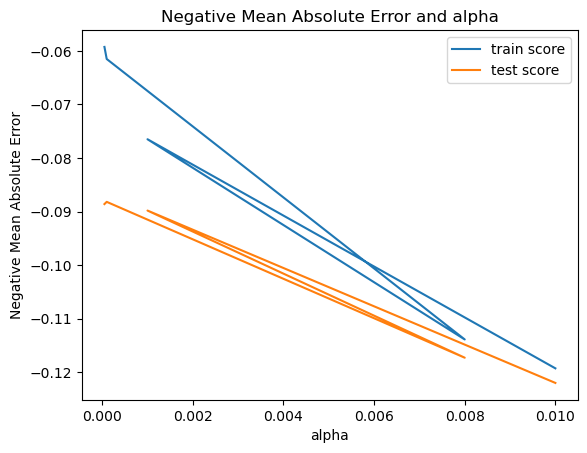

In [81]:
# Plot mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_l['param_alpha'], cv_results_l['mean_train_score'])
plt.plot(cv_results_l['param_alpha'], cv_results_l['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

Text(0.5, 0, 'Errors')

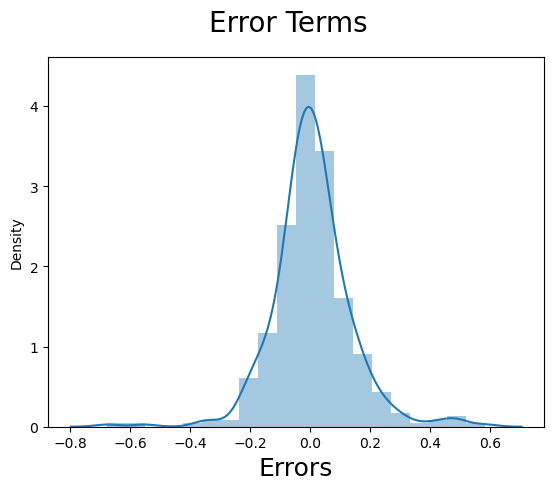

In [82]:
fig = plt.figure()
sns.distplot((y_test - y_test_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)

### Most of the values are populated at the centre (zero error) , looks fine.

Text(0.5, 0, 'Errors')

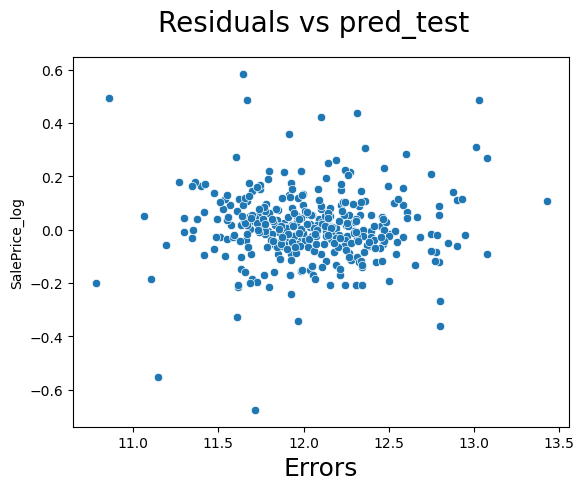

In [83]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.scatterplot(x=y_test_pred,y=(y_test - y_test_pred))
fig.suptitle('Residuals vs pred_test', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18) 

The residuals are scattered around '0'

In [84]:
main_coef=pd.Series(lasso.coef_,index=X_train.columns)
var_selected= sum(lasso.coef_!=0)
print("The number of feautures selected by lasso :",var_selected)

The number of feautures selected by lasso : 224


In [85]:
# Create a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'MAE (Train)','MAE (Test)'], 
        
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )

rg_metric = pd.Series(metric1, name = 'Ridge Regression')
ls_metric = pd.Series(metric2, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Ridge Regression  Lasso Regression
0  R2 Score (Train)          0.934390          0.944886
1   R2 Score (Test)          0.896722          0.896294
2       RSS (Train)         11.226668          9.430672
3        RSS (Test)          6.339151          6.365453
4       MSE (Train)          0.010253          0.008612
5        MSE (Test)          0.017368          0.017440
6       MAE (Train)          0.067700          0.064001
7        MAE (Test)          0.091119          0.090892

#### Best parameter for Ridge is 6.0.
#### Best parameter for Lasso is 0.0001.

In [86]:
# Prepare metrics to compare Ridge and Lasso score
betas = pd.DataFrame(index=X_train.columns)
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas.sort_values(by=['Lasso'], ascending=False).head(15)

Ridge     Lasso
GrLivArea              0.246232  0.394877
MSZoning_FV            0.093585  0.394274
MSZoning_RL            0.077302  0.338345
MSZoning_RH            0.042617  0.322354
MSZoning_RM            0.046460  0.312537
RoofMatl_WdShngl       0.084800  0.282391
BsmtQual_No_Basement   0.033211  0.221890
BsmtFullBath_3         0.036814  0.186989
Neighborhood_StoneBr   0.124001  0.162926
OverallQual_Excellent  0.123566  0.150781
Condition2_PosA        0.040473  0.147632
SaleCondition_AdjLand  0.040612  0.136467
FullBath_3             0.100716  0.123696
Neighborhood_Crawfor   0.087673  0.102007
Neighborhood_NridgHt   0.073189  0.094205

In [87]:
# Prepare metrics to compare Ridge score
betas4 = pd.DataFrame(index=X_train.columns)
betas4['Ridge'] = ridge.coef_

betas4.sort_values(by=['Ridge'], ascending=False).head(5)

Ridge
GrLivArea              0.246232
Neighborhood_StoneBr   0.124001
OverallQual_Excellent  0.123566
FullBath_3             0.100716
OverallQual_Very Good  0.094077

### Question 1: Double the values of Alpha for Ridge and Lasso
- Best parameter for Ridge is 6.0.
- Best parameter for Lasso is 0.0001.

### After doubling the values
- Best parameter for Ridge is 12.0.
- Best parameter for Lasso is 0.0002.

In [88]:
# Ridge Regresssion
# Earlier for Ridge alpha = 6 now take 12
alpha = 12
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print('ridge.coef: ', ridge.coef_)
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

train1_r2 = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print('R2_Score_Train: ', train1_r2)

test1_r2 = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print('R2_Score_Test: ', test1_r2)

ridge.coef:  [-1.41424076e-02 -5.91311844e-02  3.56433761e-02  2.40184307e-02
  5.78208102e-03 -4.35229843e-03  3.23363281e-02  1.98157266e-02
 -1.12043114e-02 -3.57224585e-02  1.20184291e-02 -6.66371386e-03
  1.32159634e-02 -9.12718890e-04  6.22589767e-02  1.89109492e-02
  5.60580512e-02  1.76235988e-02  4.68774225e-02  4.18425323e-02
 -3.10458049e-02  1.40761690e-03  5.02271839e-02  8.90494906e-03
  3.74230661e-02  0.00000000e+00  2.69600742e-02 -3.44539781e-02
 -1.37449518e-02 -5.47839369e-03  1.84623163e-02 -1.72857556e-02
  1.46332231e-04  3.20023236e-03  3.27528693e-02  2.27281472e-02
 -1.38621151e-02  8.13358644e-02 -7.32022976e-02 -2.93092917e-02
 -7.47856543e-02 -5.40673589e-02 -2.83553117e-02 -2.46284480e-02
  8.81699225e-03 -2.24124355e-02  4.14432550e-02  6.41281615e-02
 -3.97172871e-02 -1.64176383e-02 -1.10642606e-02 -6.63004390e-03
  3.06031215e-02  9.87175037e-02 -8.75041171e-03  2.50794517e-02
 -1.26828063e-02  4.55344172e-02  1.20674589e-02  8.93877809e-04
 -4.37290709

In [89]:
# Prepare metrics for Ridge coefficient
betas1 = pd.DataFrame(index=X_train.columns)
betas1['Ridge'] = ridge.coef_
betas1.sort_values(by=['Ridge'], ascending=False).head(5)

Ridge
GrLivArea              0.208251
OverallQual_Excellent  0.106975
1stFlrSF               0.106616
Neighborhood_StoneBr   0.098718
OverallQual_Very Good  0.086406

### R2 score dropped from 
### 0.934390 to 0.927772 for train data
### 0.896722 to 0.895274 for test data.

In [90]:
# Lasso
# Earlier for Lass alpha = 0.0001 now take 0.0002.
alpha = 0.0002
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)
print('lasso.coef: ', lasso.coef_)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

train1_r2 = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print('R2_Score_Train: ', train1_r2)

test1_r2 = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print('R2_Score_Test: ', test1_r2)

lasso.coef:  [-3.69136068e-02 -4.33708280e-02  3.41706905e-02  3.44693807e-03
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -9.67504358e-03 -6.84303764e-02  0.00000000e+00 -0.00000000e+00
  5.64350328e-03  5.17412196e-03  2.52234378e-01  1.71019609e-01
  2.08553199e-01  1.84348496e-01  4.51226688e-02  4.11376013e-02
 -1.14539638e-02  4.69887428e-03  4.90297229e-02  1.31573098e-03
  3.96362212e-02  0.00000000e+00  3.18512239e-02 -3.61255953e-02
 -2.07254456e-02 -5.16354807e-03  1.53594319e-02 -2.21001394e-02
 -0.00000000e+00 -0.00000000e+00  2.80696346e-02  2.86960085e-02
 -0.00000000e+00  1.04579470e-01 -7.43670173e-02 -9.65053191e-03
 -8.14050517e-02 -9.88719372e-02 -2.28046614e-02 -2.12985273e-02
  0.00000000e+00 -1.49403767e-02  7.20945192e-02  9.42990539e-02
 -6.88646109e-02 -1.17618422e-02 -0.00000000e+00  7.32822035e-03
  2.32352549e-02  1.59884852e-01 -0.00000000e+00  2.28036816e-02
 -1.02197620e-02  4.76143189e-02  0.00000000e+00  3.30573889e-02
 -7.43867731

In [91]:
##Prepare metric for Lasso coefficient
betas2 = pd.DataFrame(index=X_train.columns)
betas2['Lasso'] = lasso.coef_
betas2.sort_values(by=['Lasso'], ascending=False).head(5)

Lasso
GrLivArea         0.376833
MSZoning_FV       0.252234
MSZoning_RL       0.208553
RoofMatl_WdShngl  0.193319
MSZoning_RM       0.184348

### With alpha of 0.0002 for Lasso, R2 score dropped for train but increased for test 
### 0.944886 to 0.93943 for train data
### 0.896294 to 0.897006 for test data

### Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?



In [96]:
# Rebuild lasso
params = {'alpha': [0.00005, 0.0001, 0.008, 0.001, 0.01]}
lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.008, 0.001, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [97]:
cv_results_l = pd.DataFrame(lasso_cv.cv_results_)
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 0.0001}
-0.0925486564011619


In [98]:
#final lasso model
alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

##Getting R2 score after dropping top 5 columns

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

train1_r2 = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print('R2_Score_Train: ', train1_r2)

test1_r2 = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print('R2_Score_Test: ', test1_r2)

R2_Score_Train:  0.9062067590148964
R2_Score_Test:  0.8864693094324567


### After rebuilding R2 score changed from 0.944886 to 0.906206 for train and 0.896294 to 0.886469 for test.

### Top 5 features after rebuilding

In [99]:
##Prepare metric for Lasso coefficient
betas3 = pd.DataFrame(index=X_train.columns)
betas3['Lasso'] = lasso.coef_
betas3.sort_values(by=['Lasso'], ascending=False).head(5)

Lasso
1stFlrSF               0.283976
OverallQual_Excellent  0.164377
Neighborhood_StoneBr   0.120867
Neighborhood_Crawfor   0.112007
OverallQual_Very Good  0.109797